In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#定義layer
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases   

    #自由選擇激活函數
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [3]:
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

In [4]:
#組裝神經網路
# add hidden layer
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l1, 10, 1, activation_function=None)

In [5]:
#接下來製造一些數據和雜訊吧 
#製造出範圍為-1~1之間的 row:300 col:1 矩陣
x_data = np.linspace(-1,1,300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)

#製造出要讓網路學習的Y 並加上雜訊
y_data = np.square(x_data) - 0.5 + noise

In [6]:
# 定義loss function 並且選擇減低loss 的函數 這裡選擇GradientDescentOptimizer
# 其他方法再這裡可以找到 https://www.tensorflow.org/versions/r0.10/api_docs/python/train.html
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [7]:
#全部設定好了之後 記得初始化喔
#init = tf.initialize_all_variables() #deprecated
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

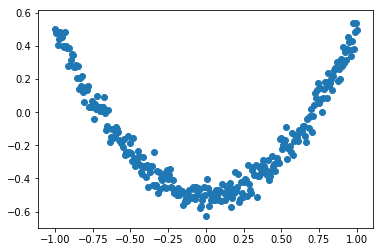

In [8]:
# 為了可以可視化我們訓練的結果
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

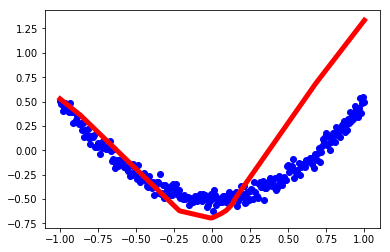

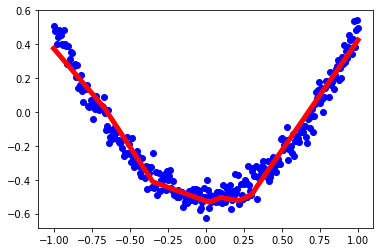

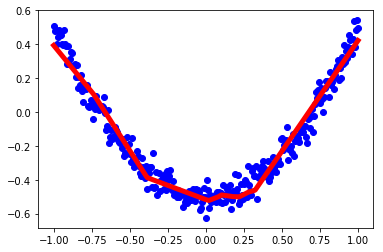

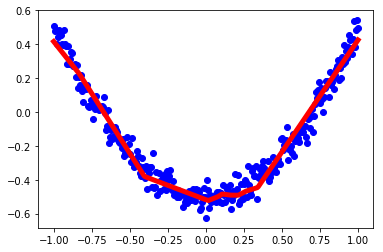

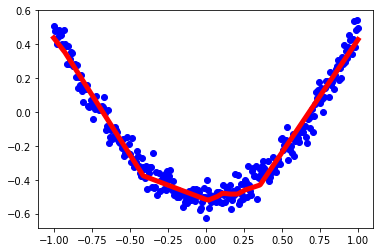

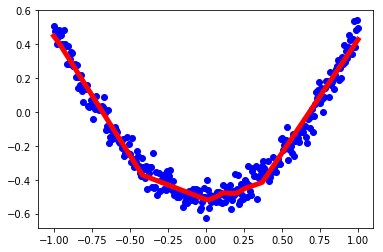

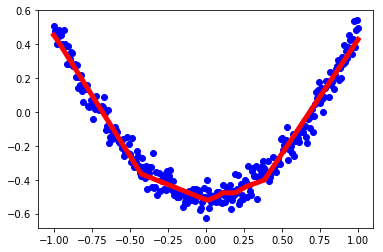

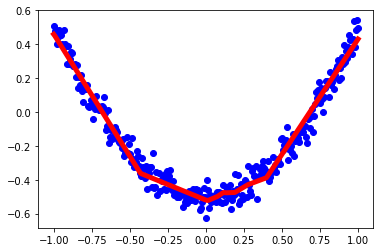

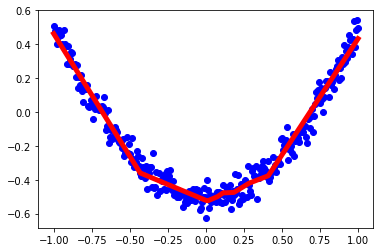

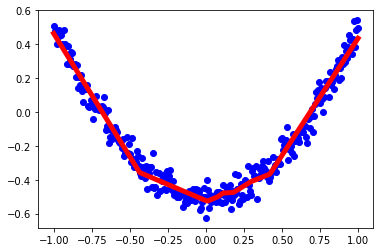

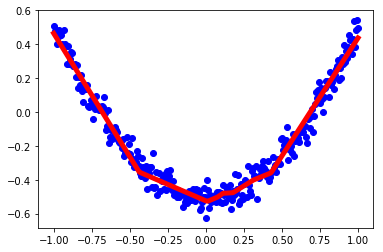

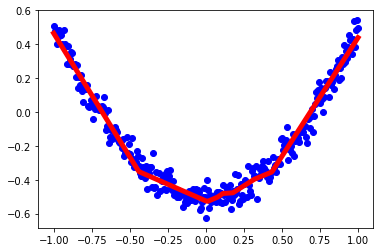

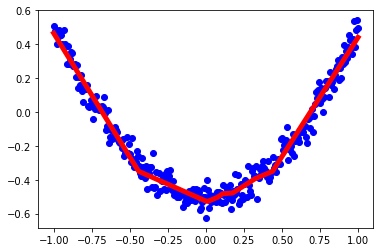

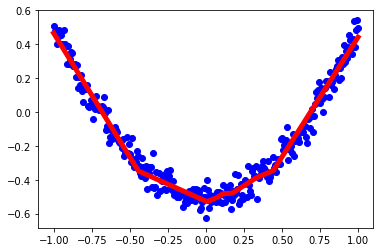

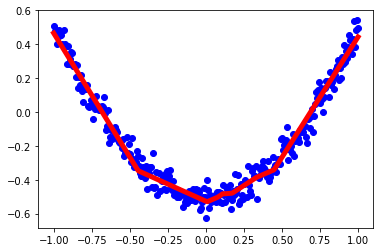

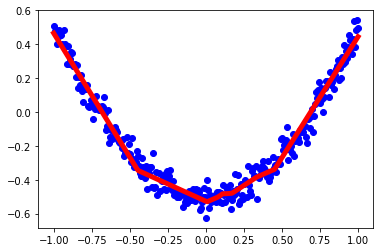

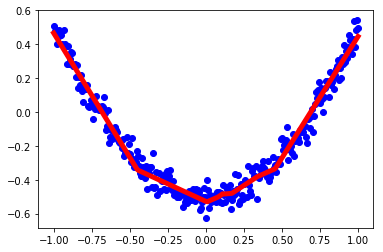

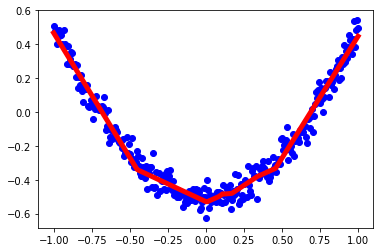

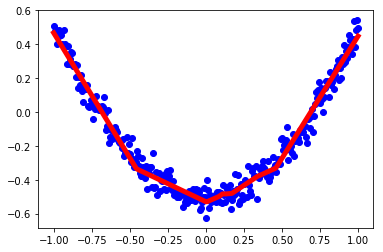

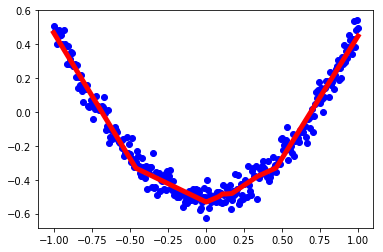

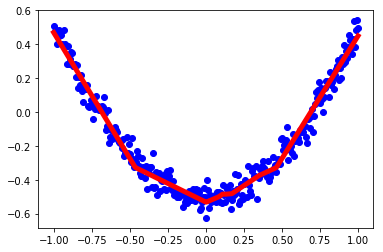

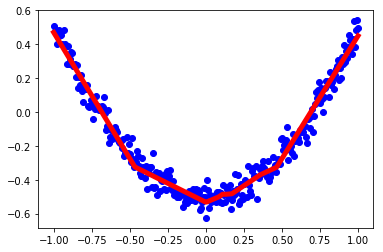

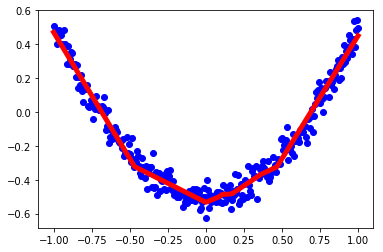

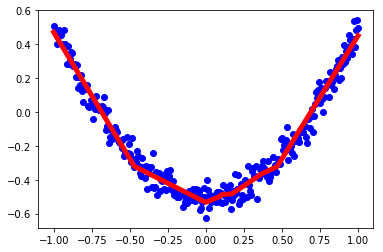

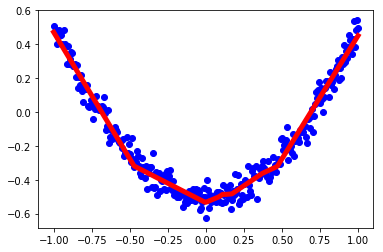

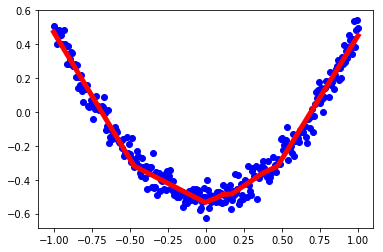

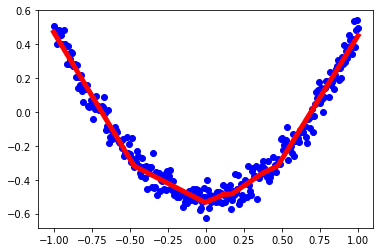

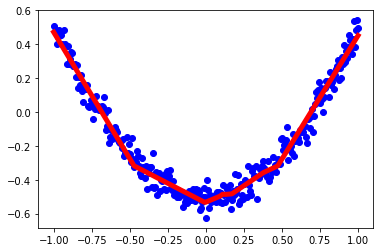

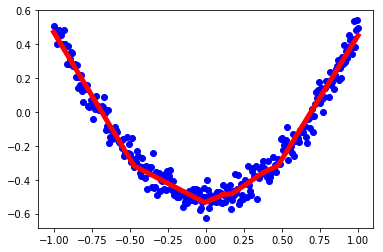

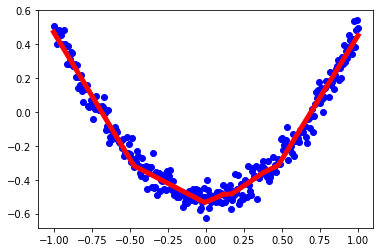

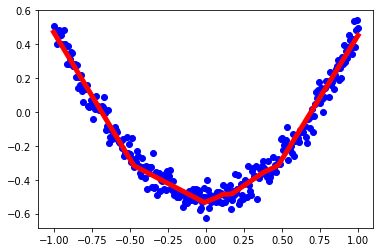

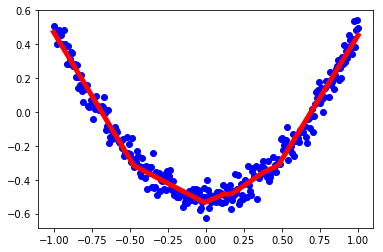

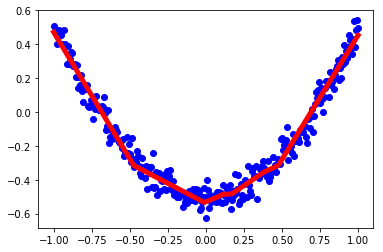

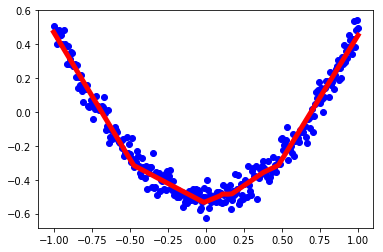

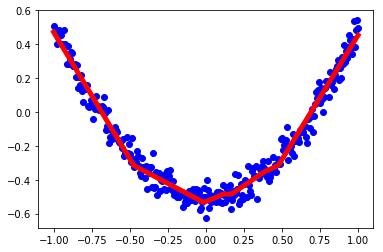

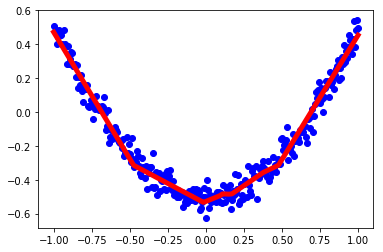

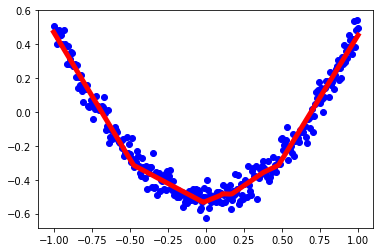

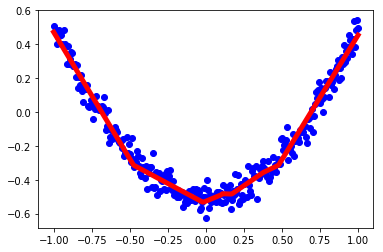

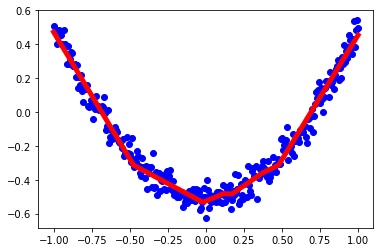

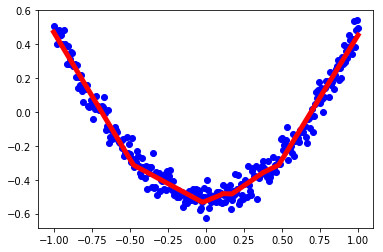

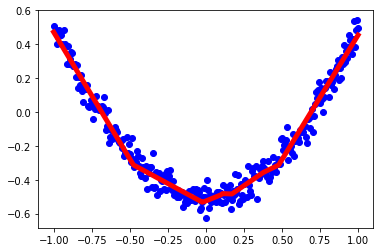

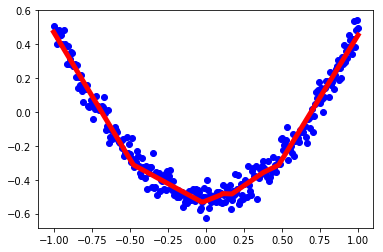

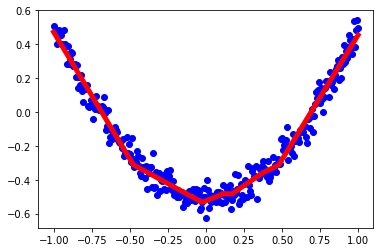

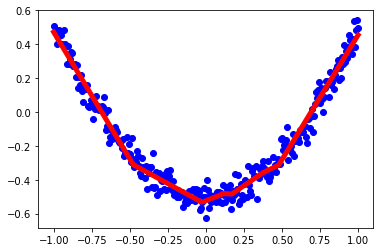

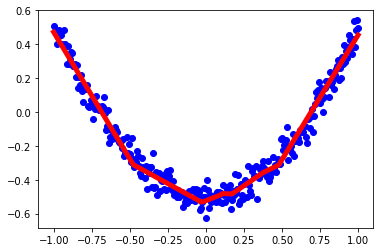

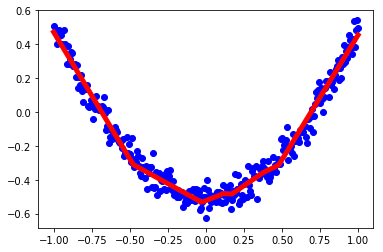

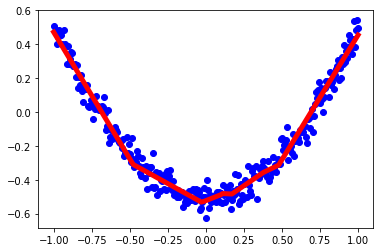

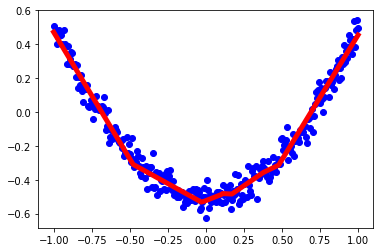

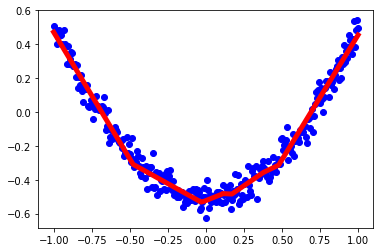

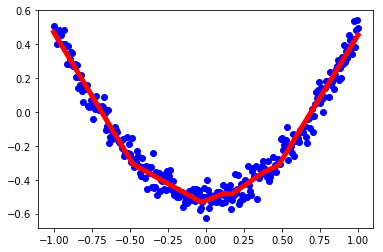

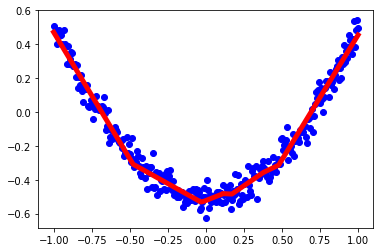

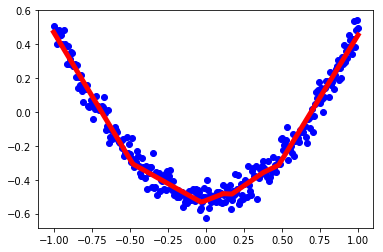

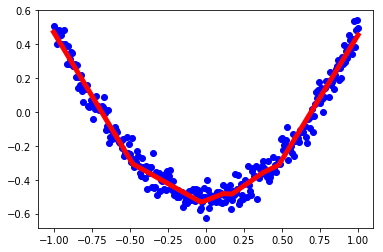

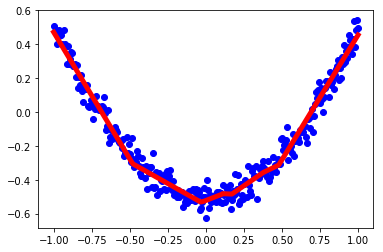

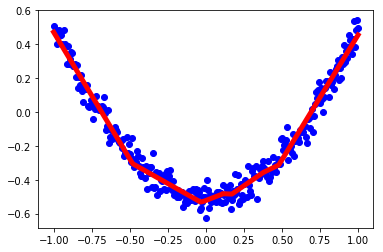

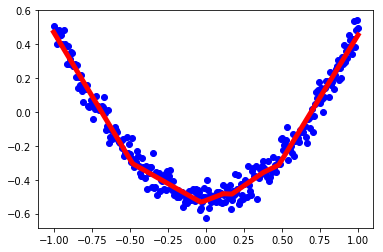

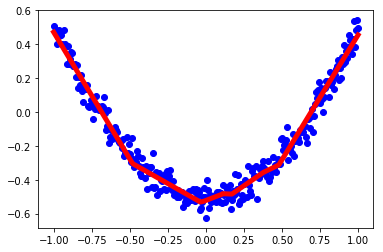

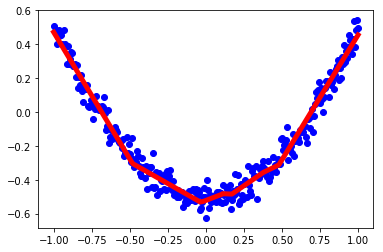

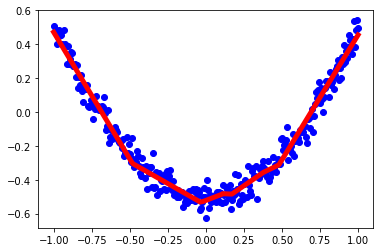

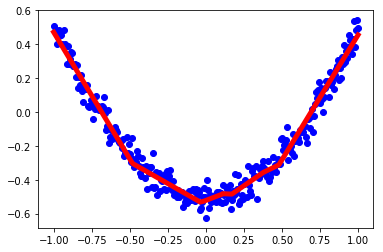

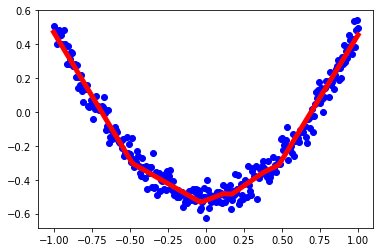

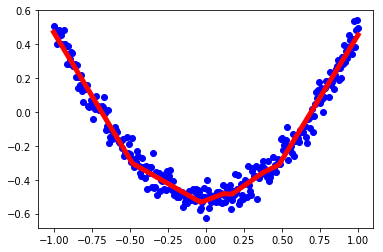

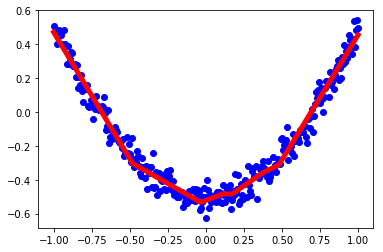

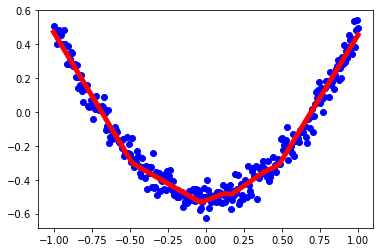

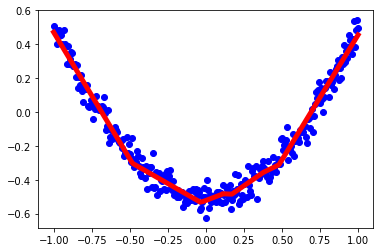

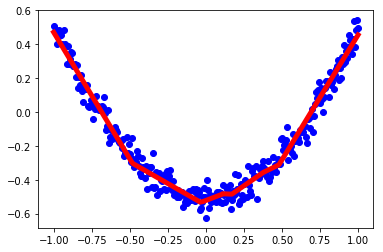

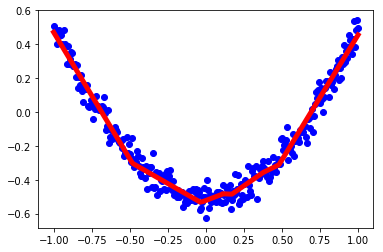

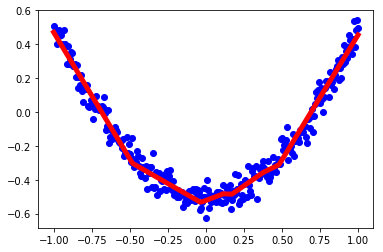

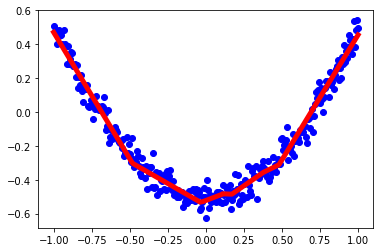

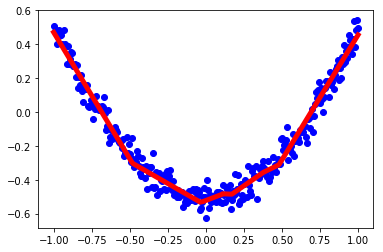

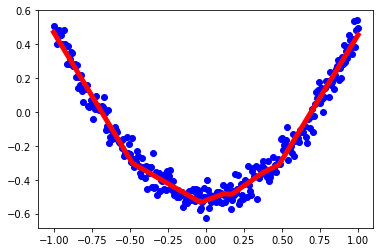

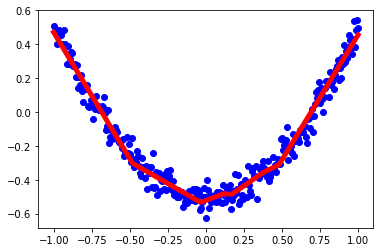

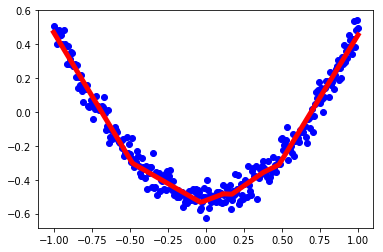

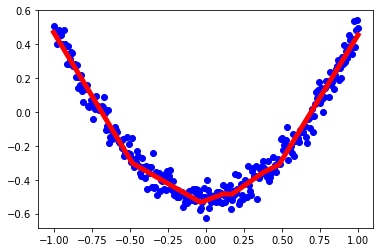

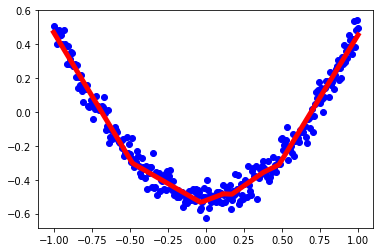

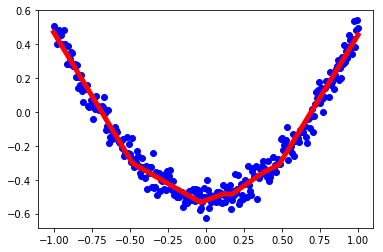

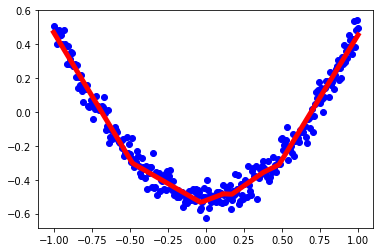

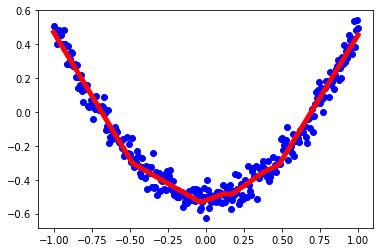

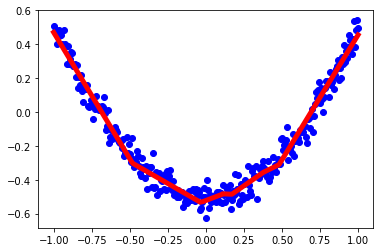

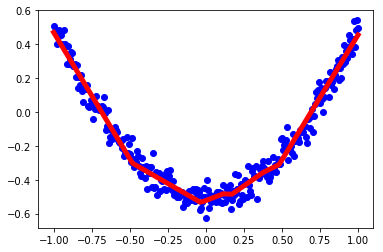

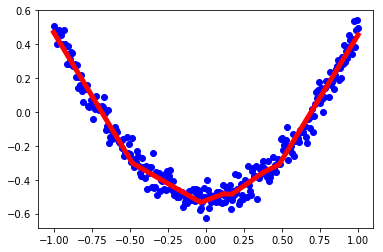

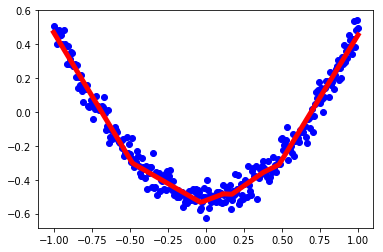

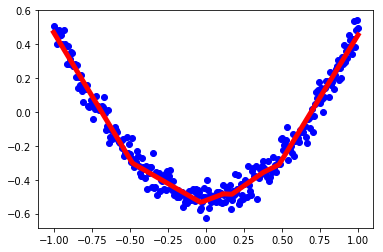

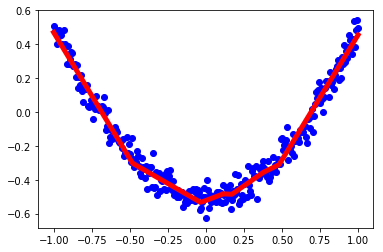

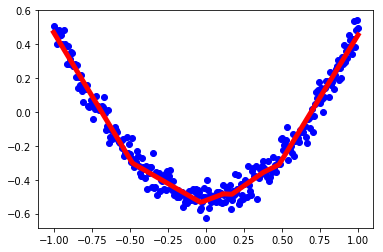

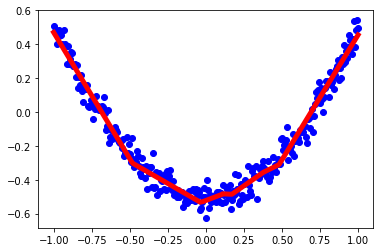

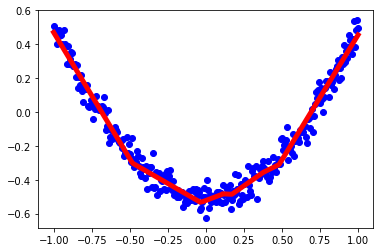

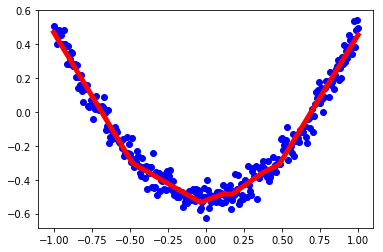

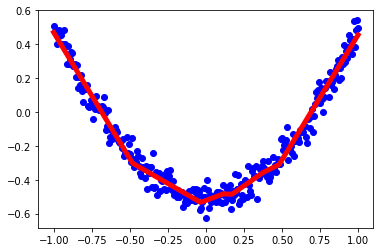

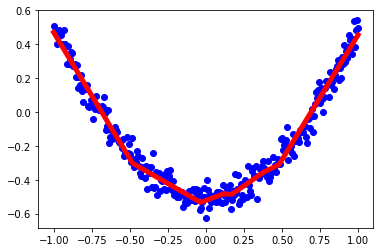

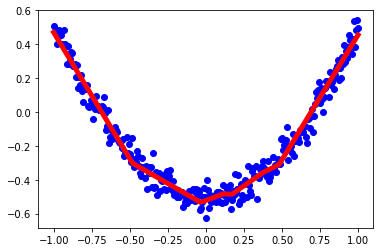

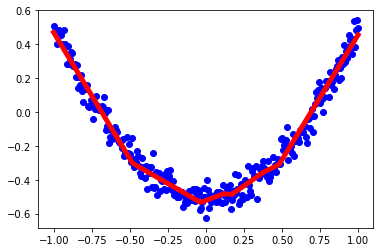

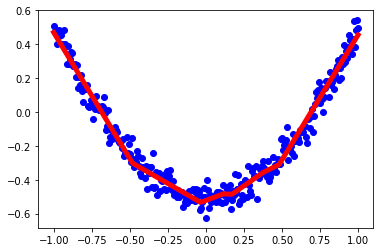

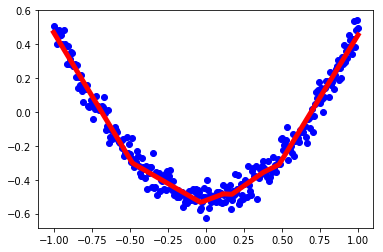

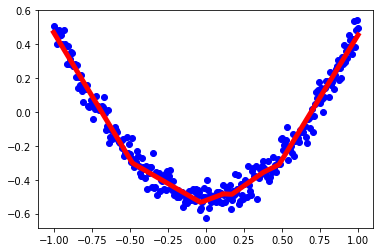

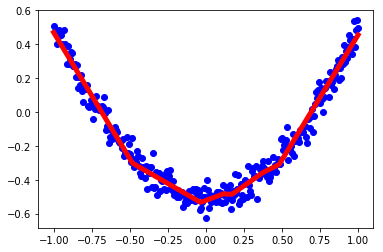

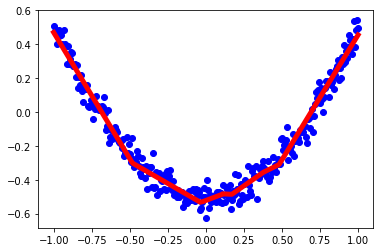

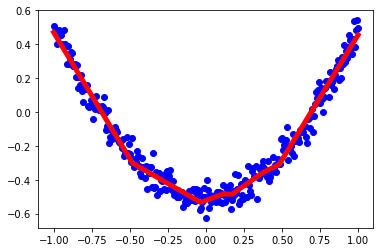

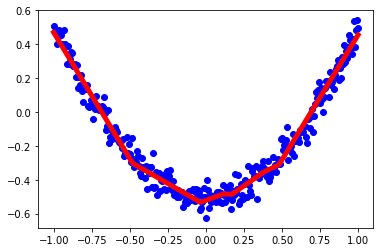

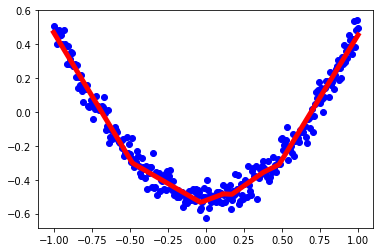

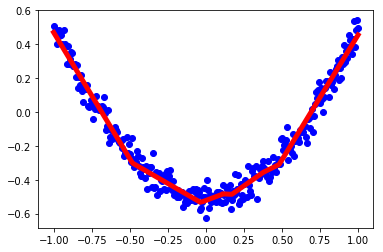

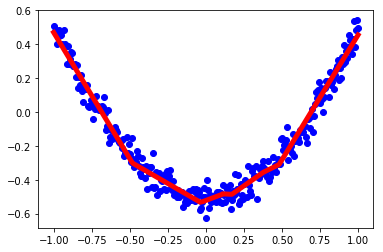

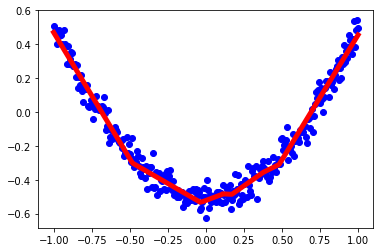

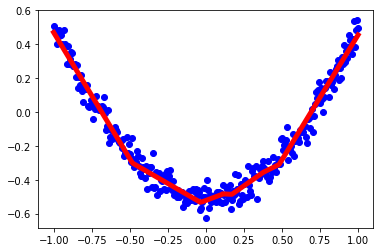

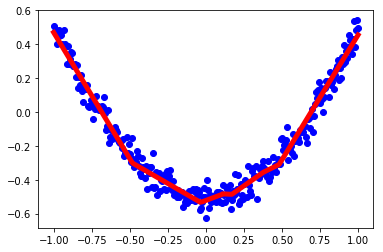

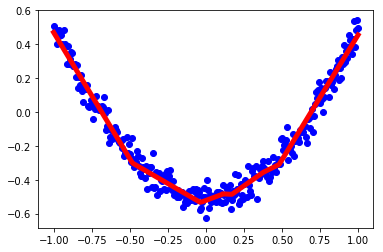

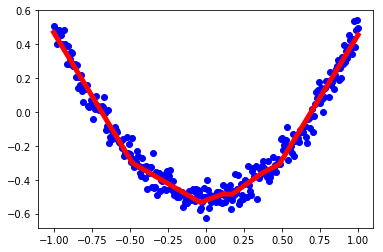

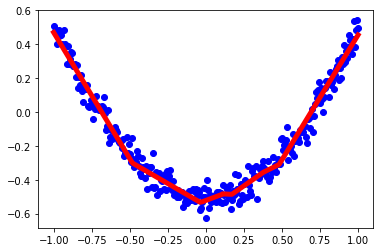

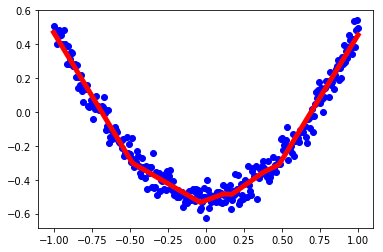

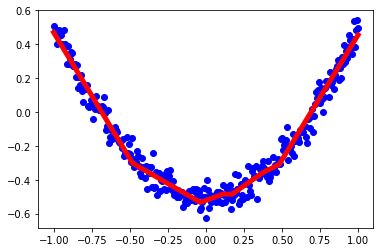

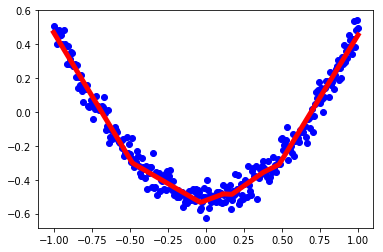

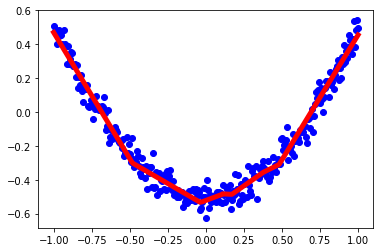

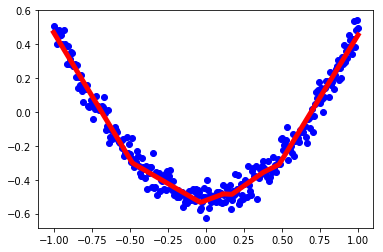

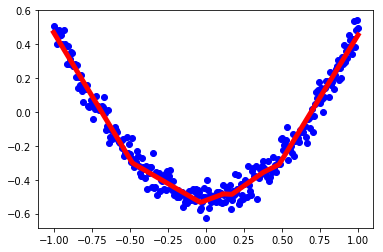

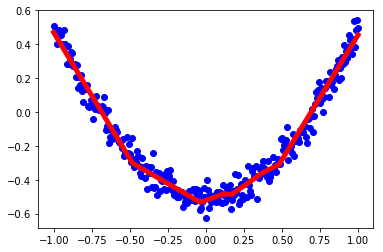

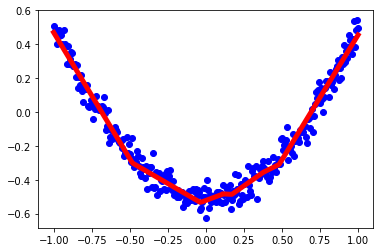

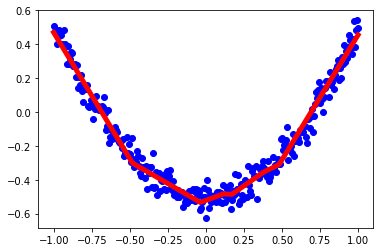

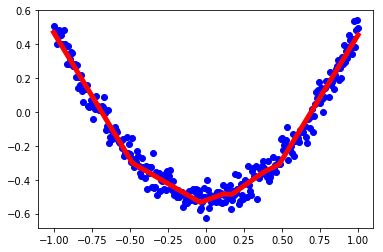

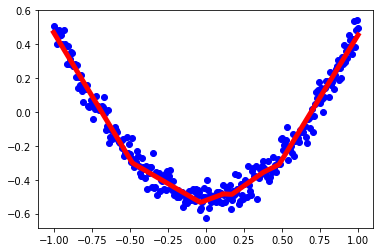

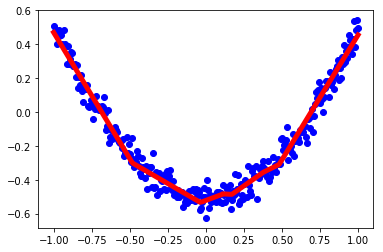

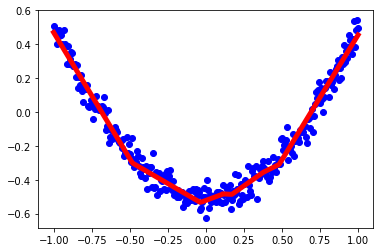

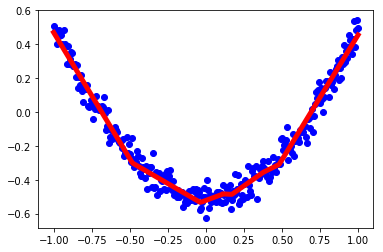

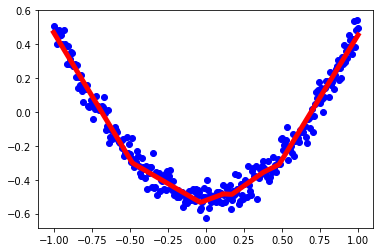

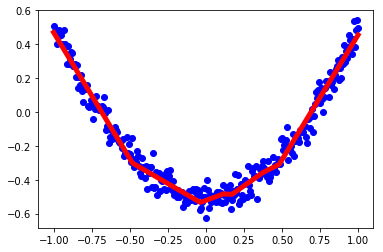

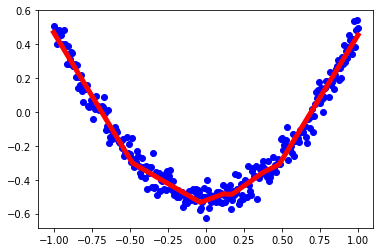

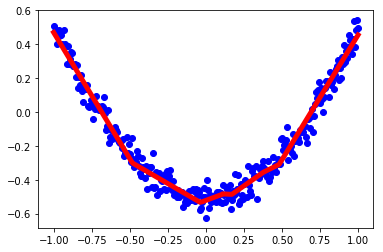

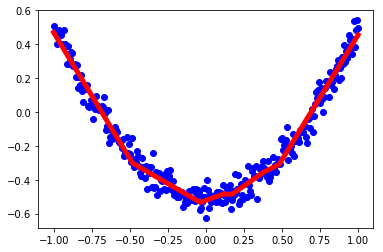

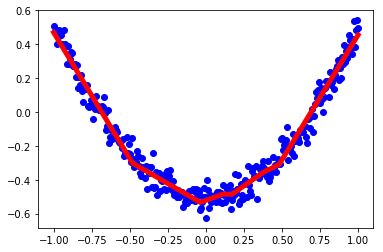

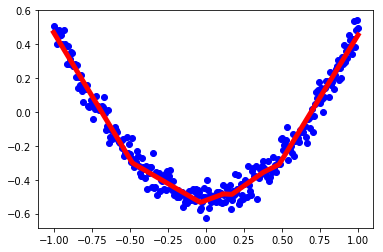

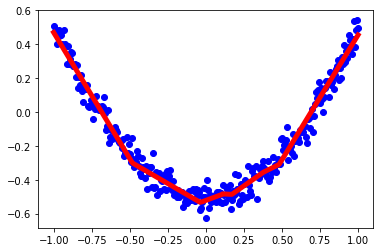

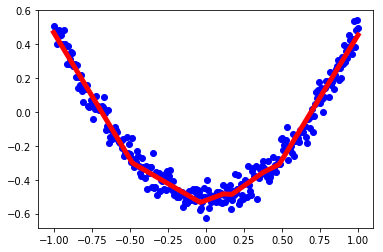

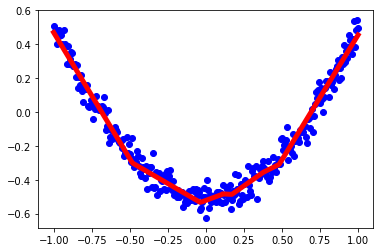

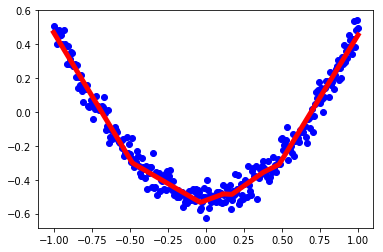

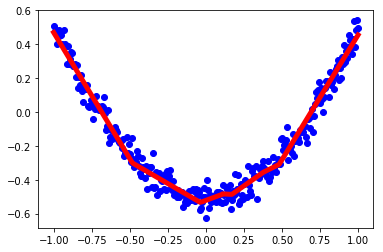

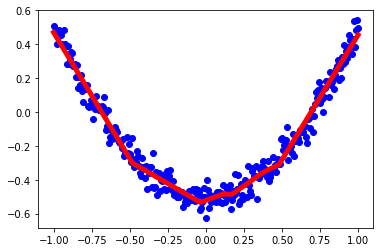

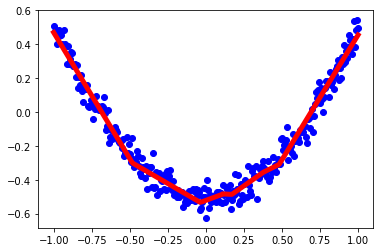

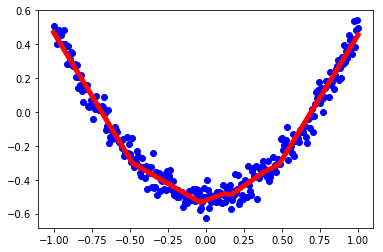

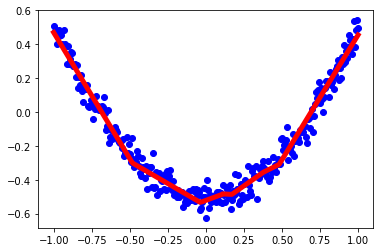

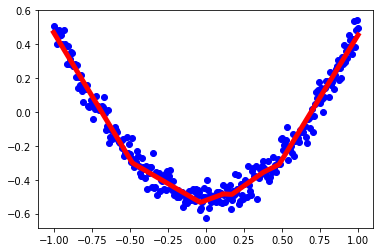

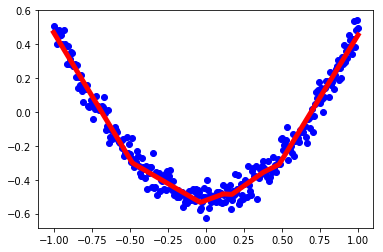

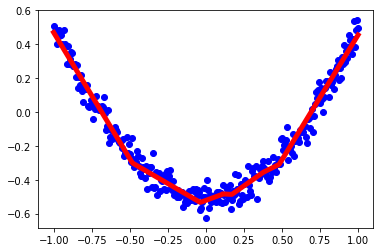

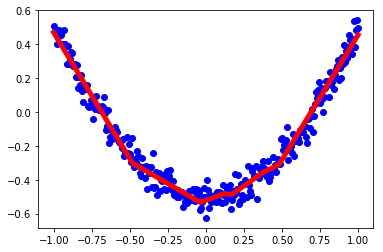

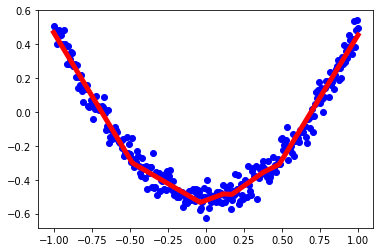

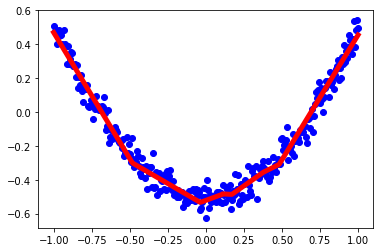

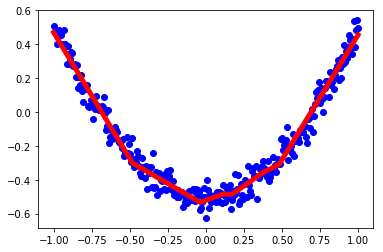

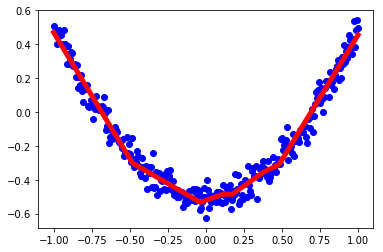

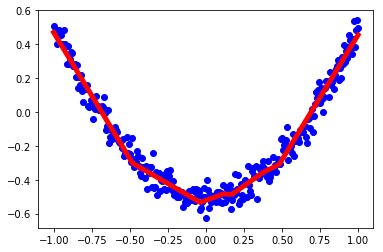

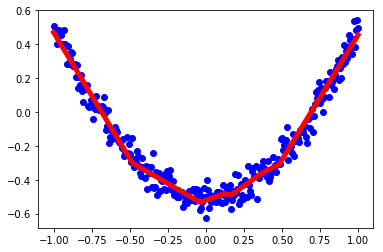

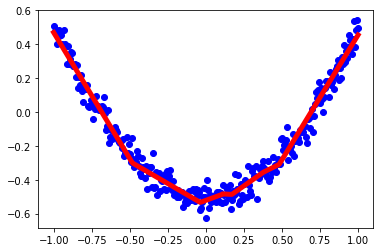

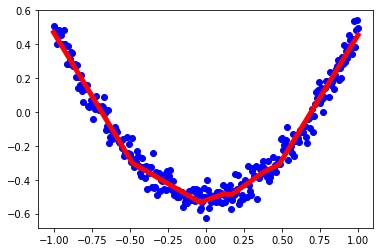

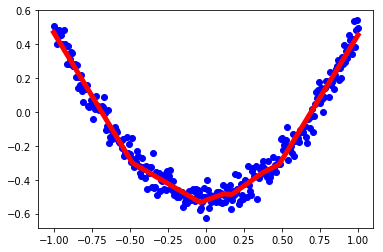

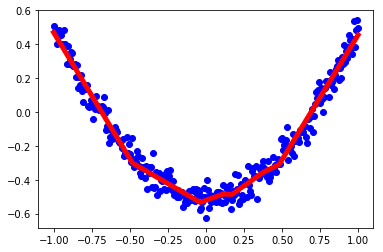

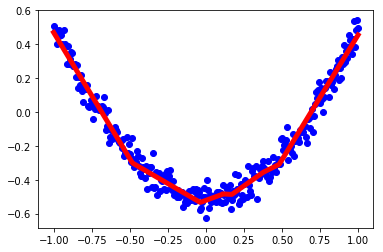

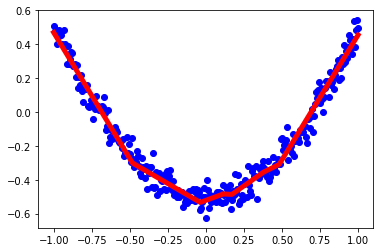

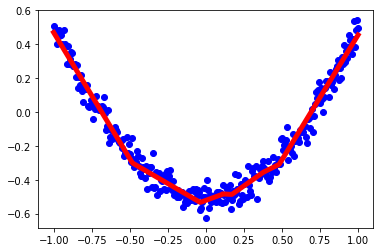

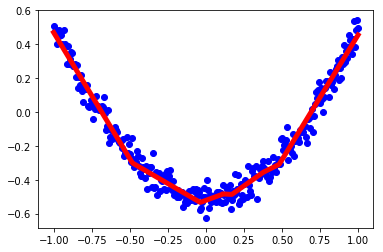

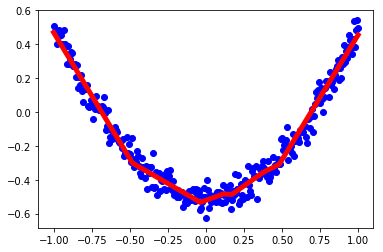

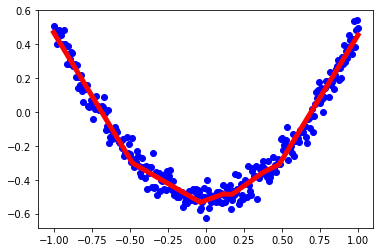

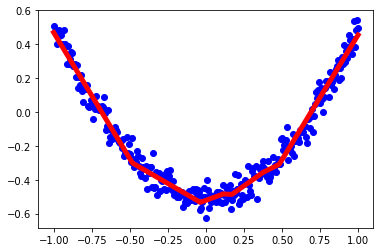

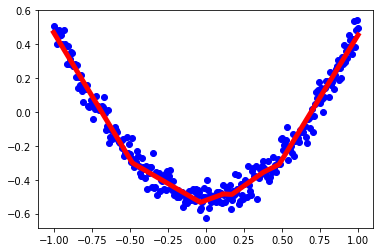

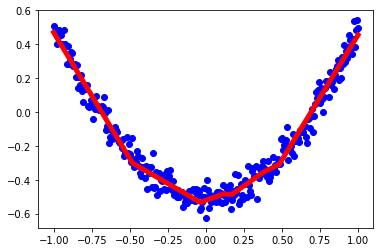

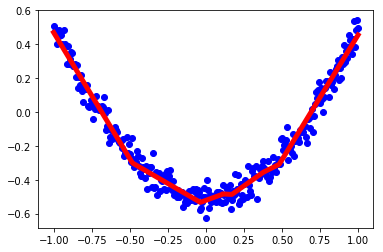

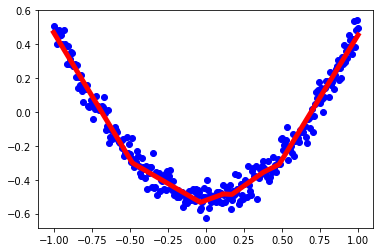

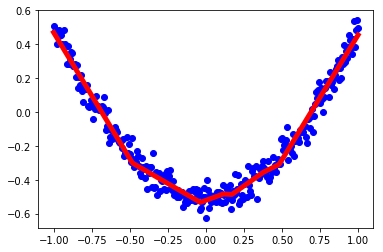

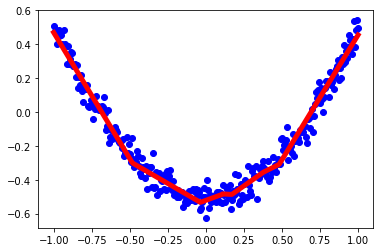

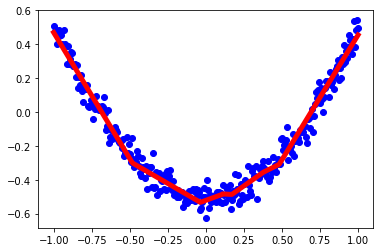

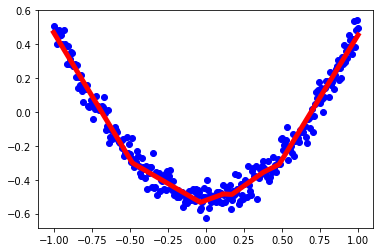

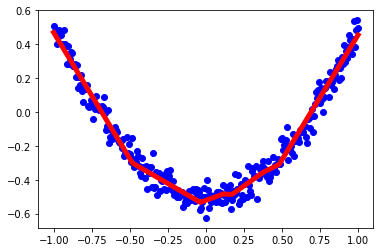

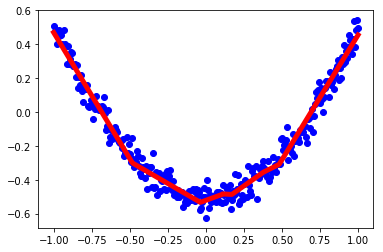

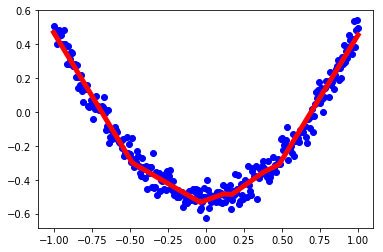

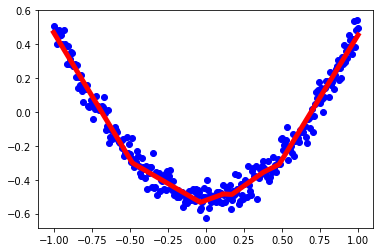

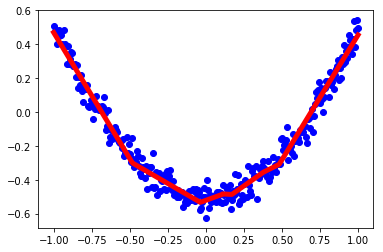

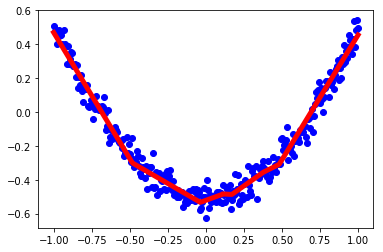

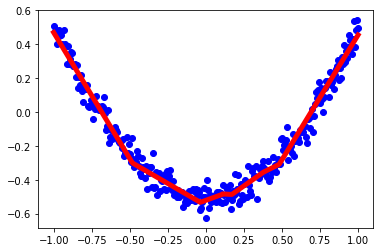

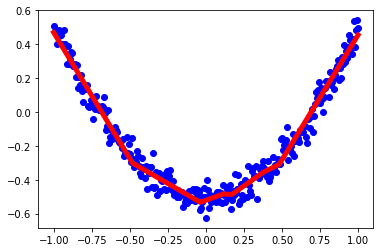

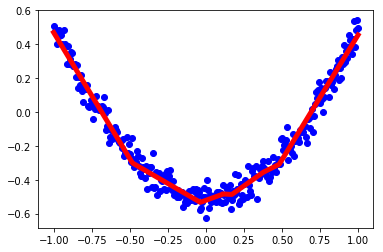

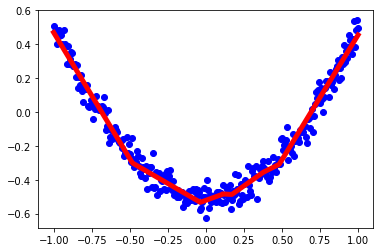

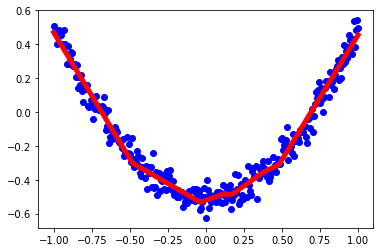

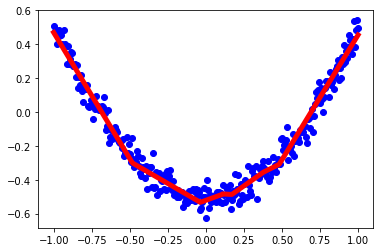

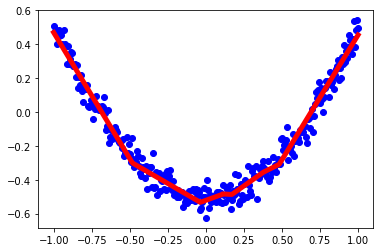

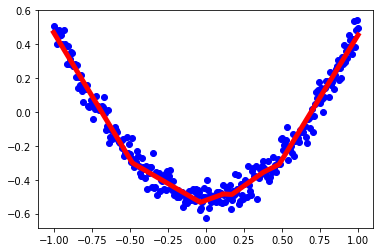

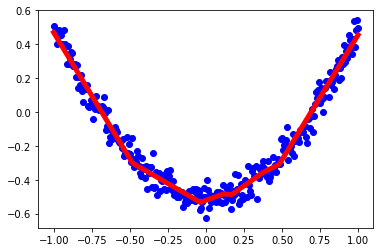

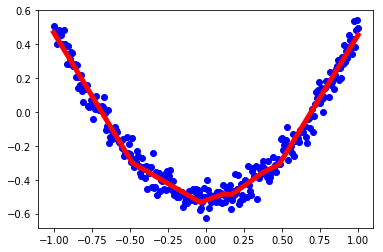

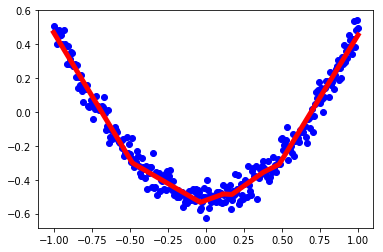

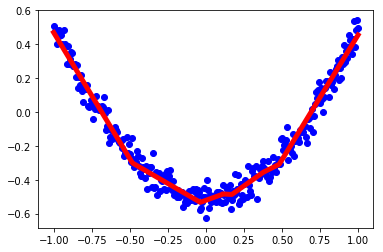

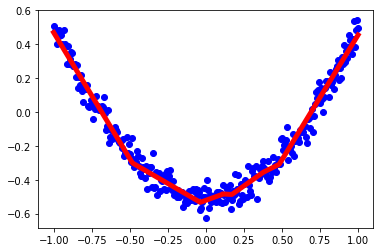

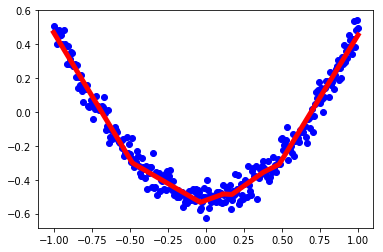

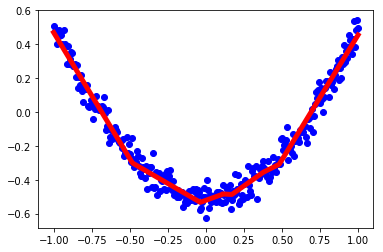

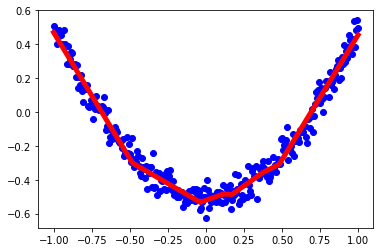

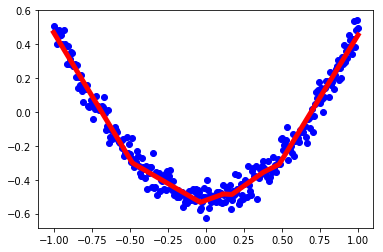

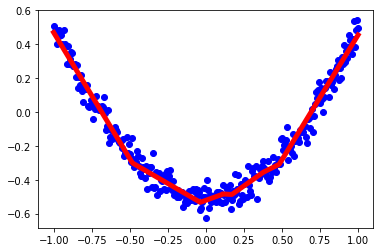

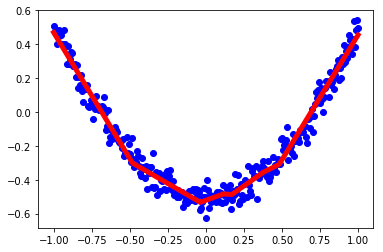

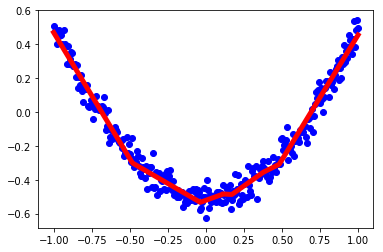

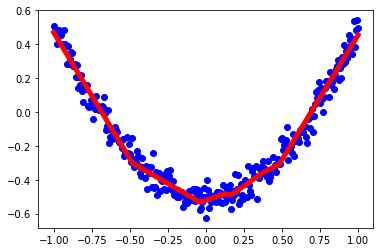

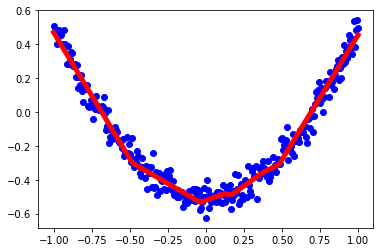

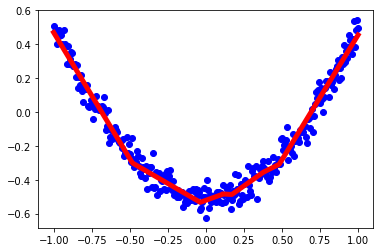

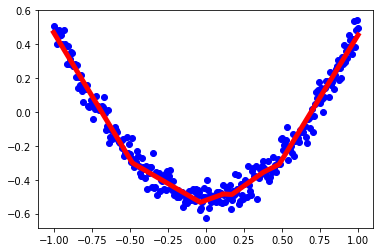

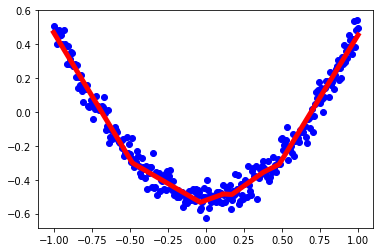

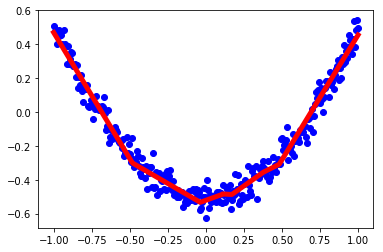

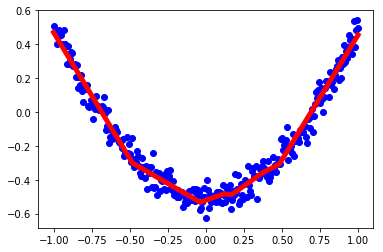

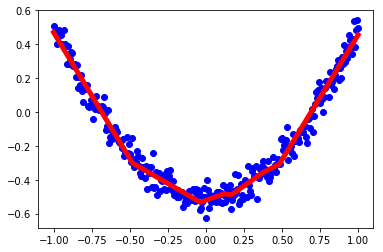

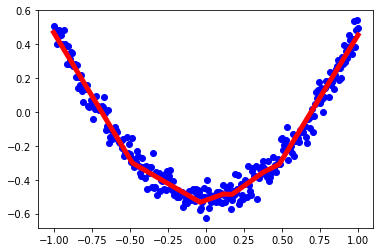

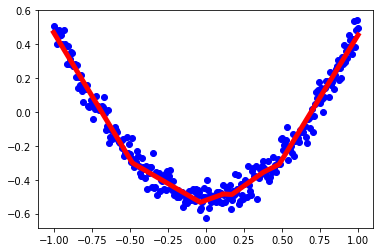

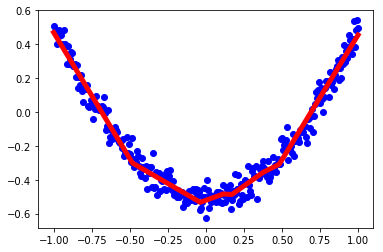

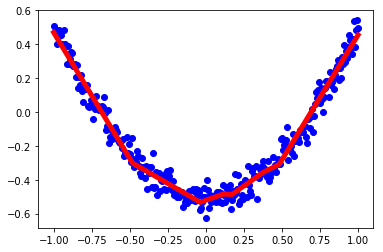

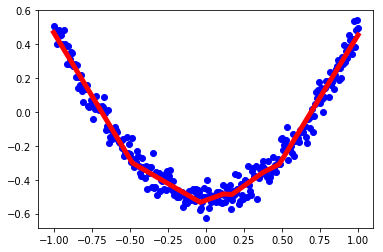

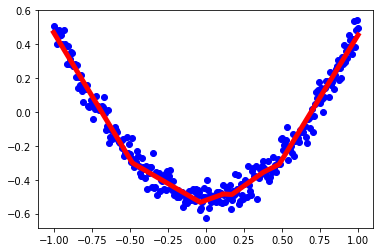

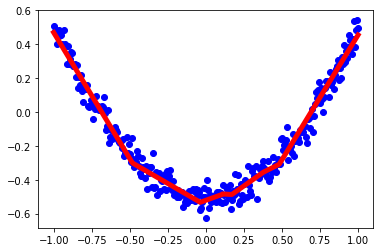

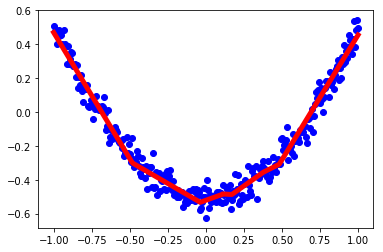

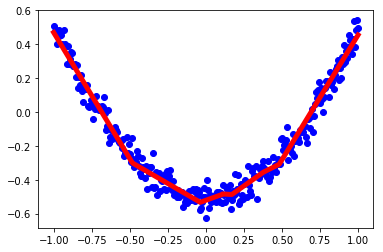

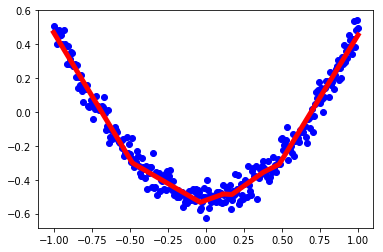

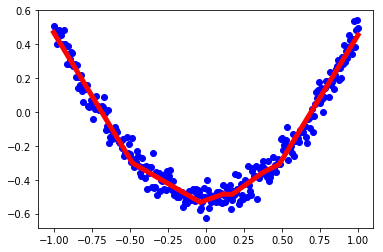

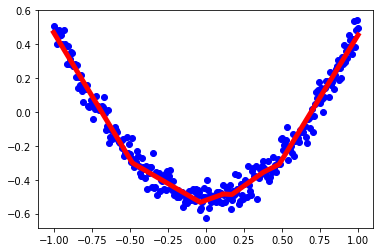

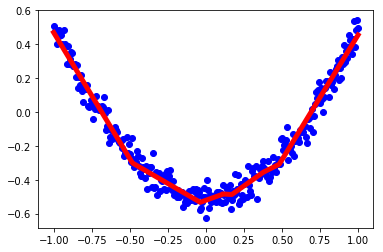

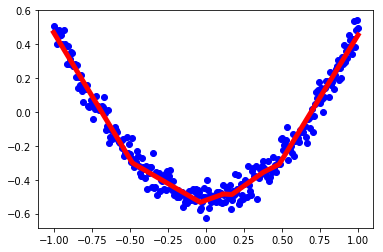

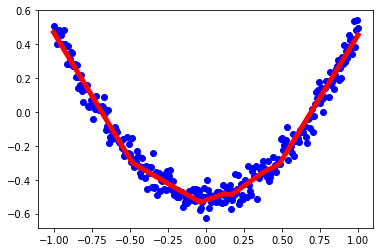

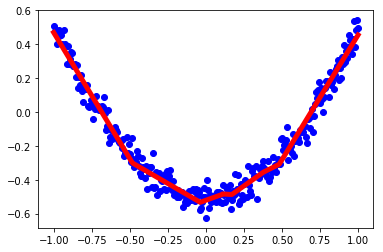

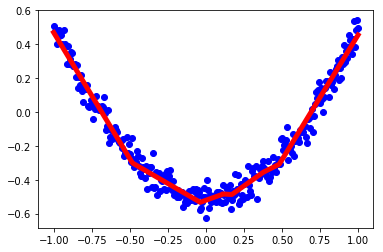

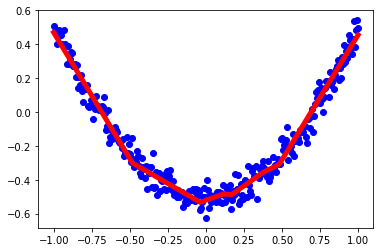

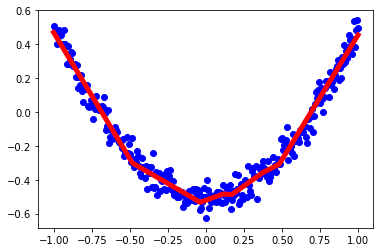

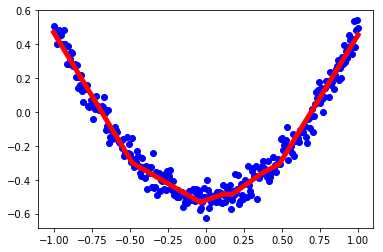

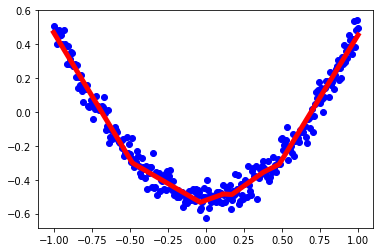

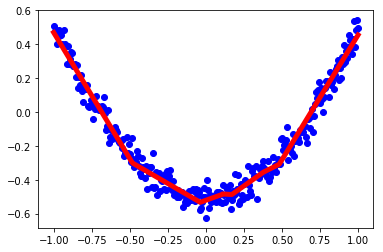

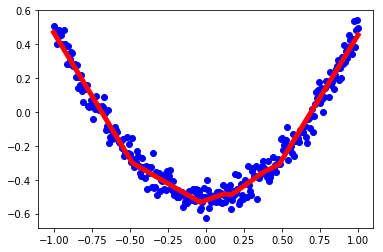

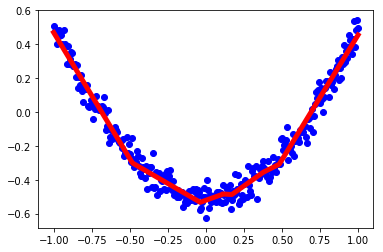

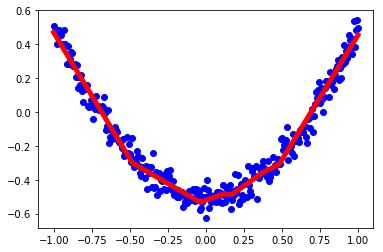

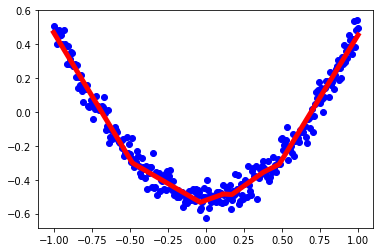

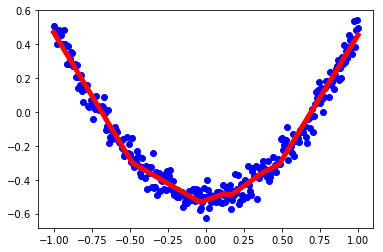

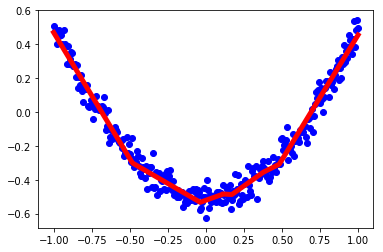

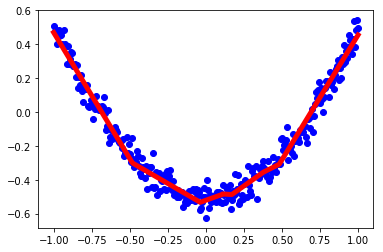

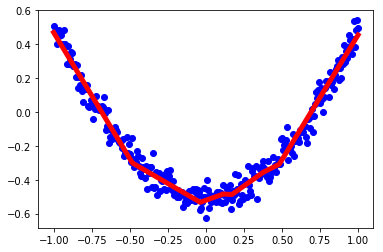

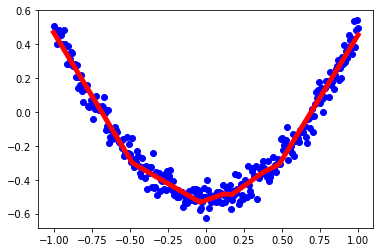

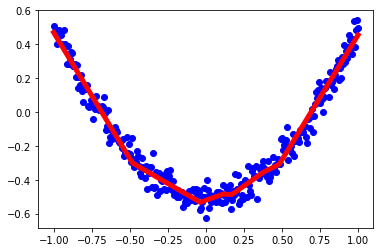

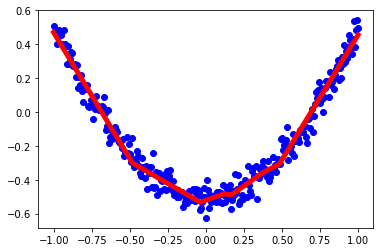

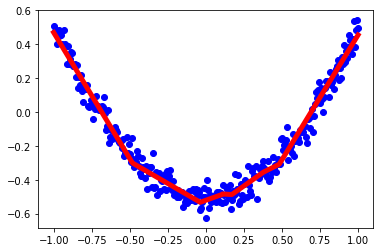

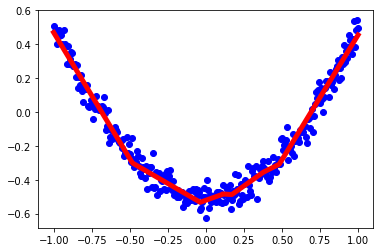

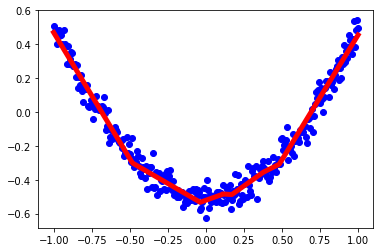

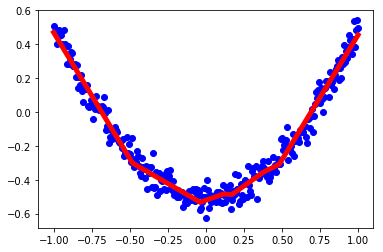

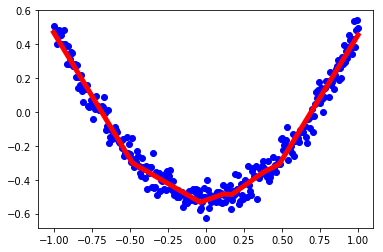

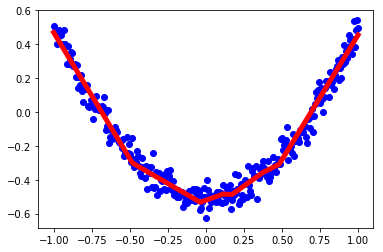

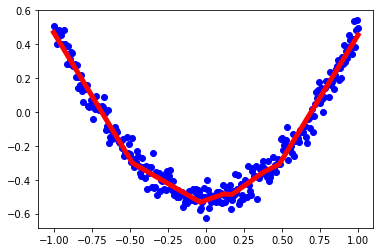

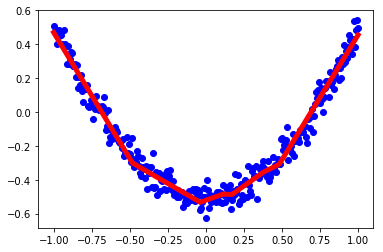

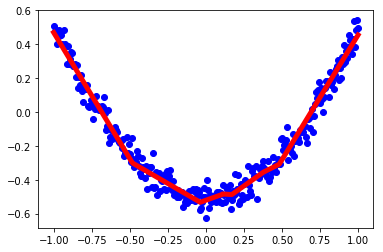

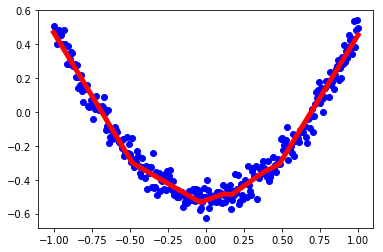

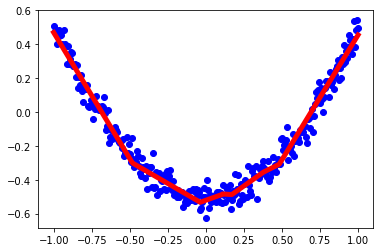

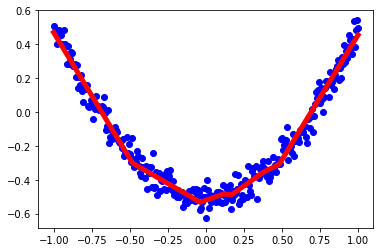

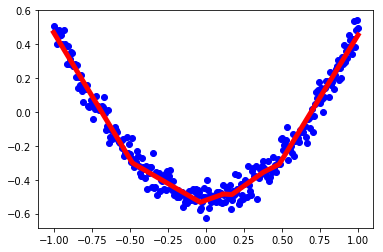

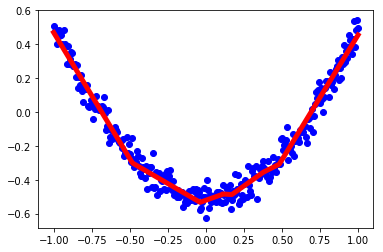

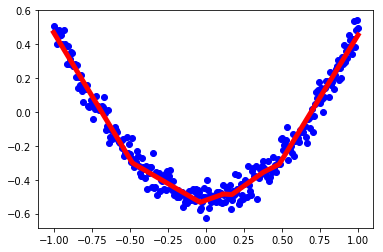

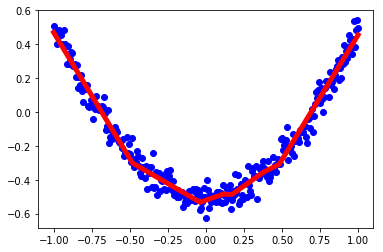

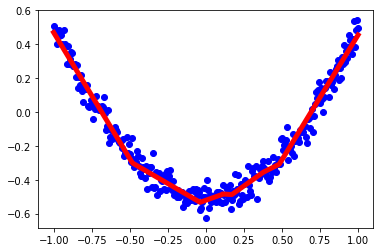

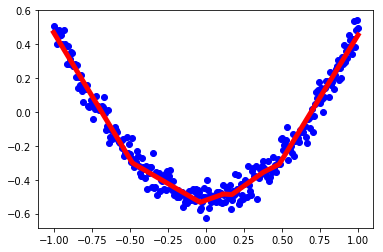

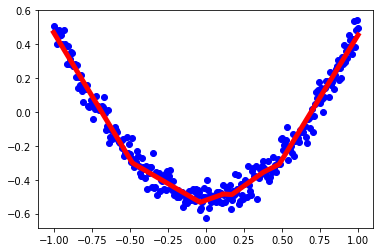

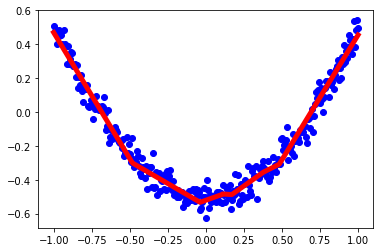

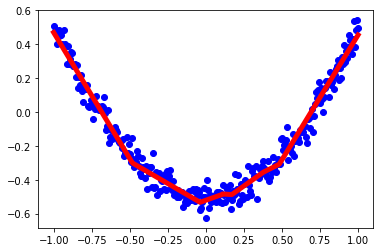

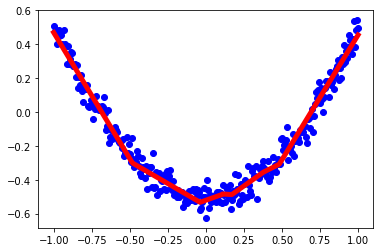

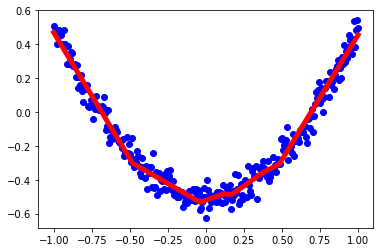

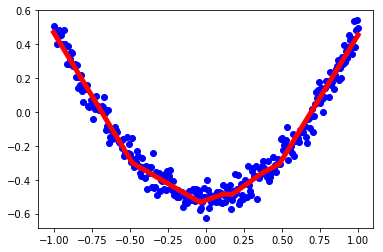

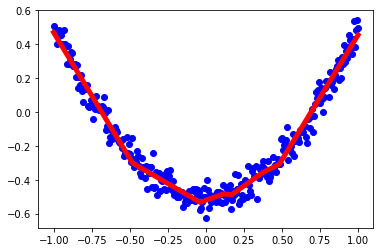

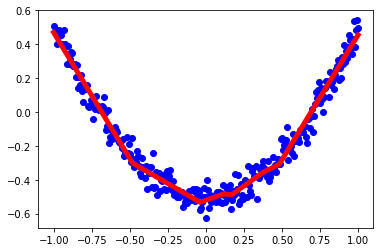

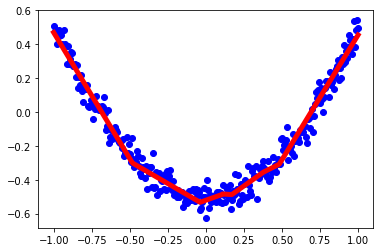

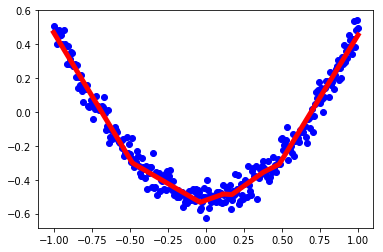

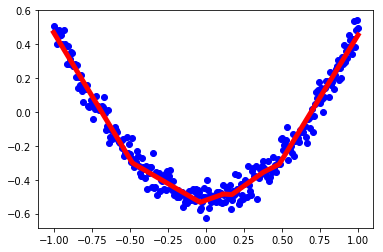

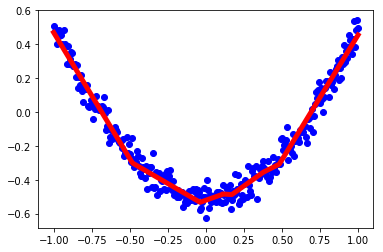

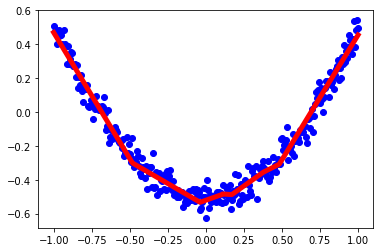

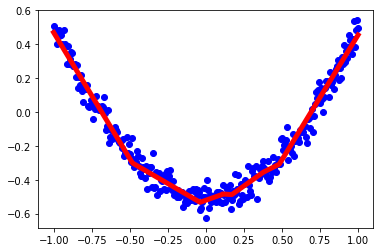

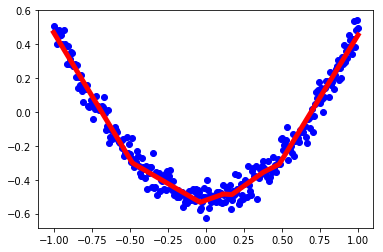

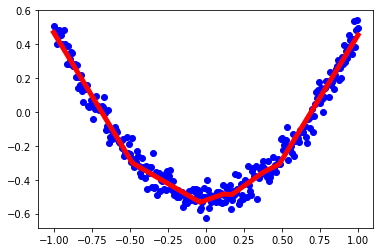

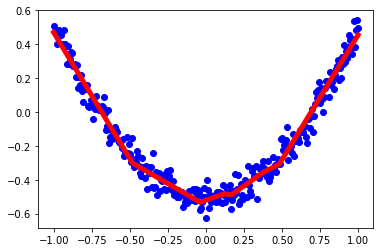

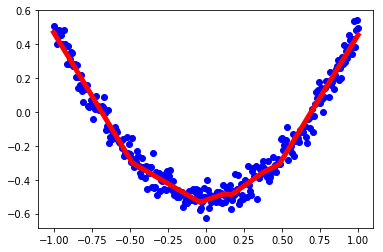

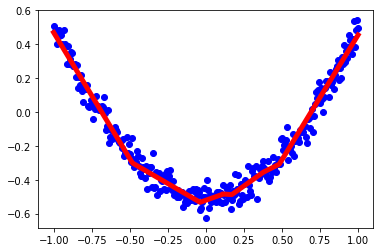

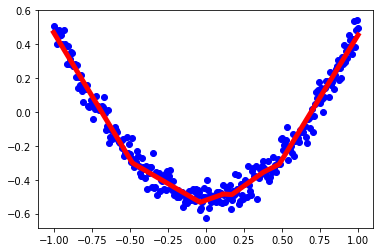

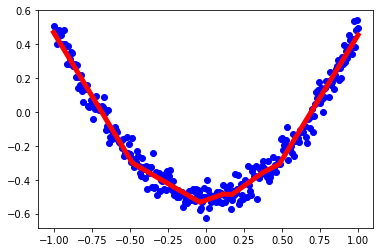

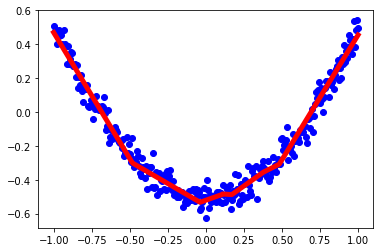

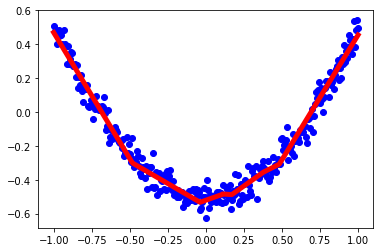

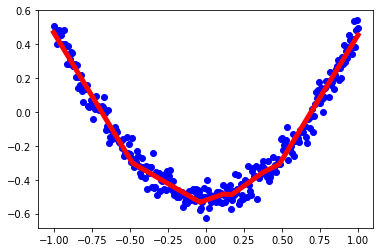

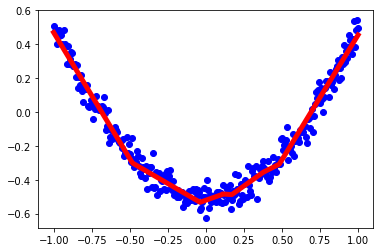

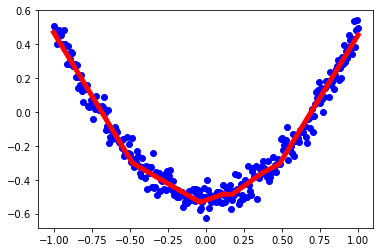

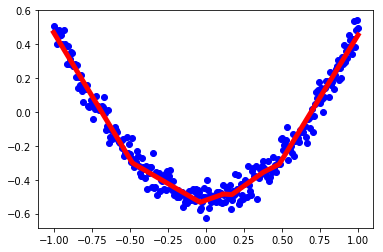

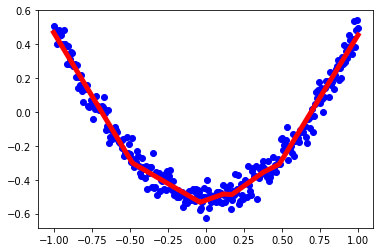

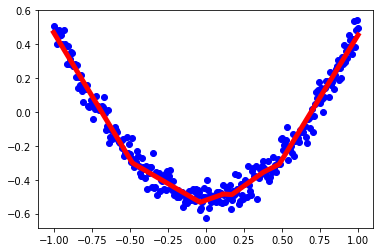

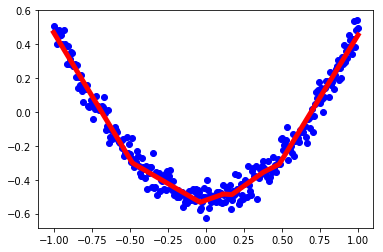

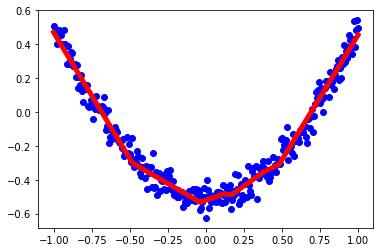

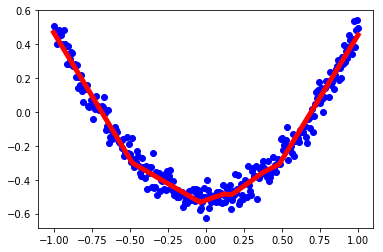

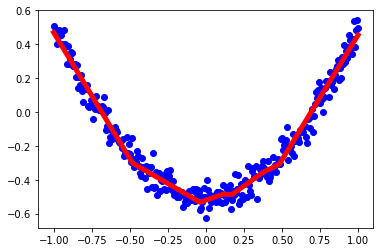

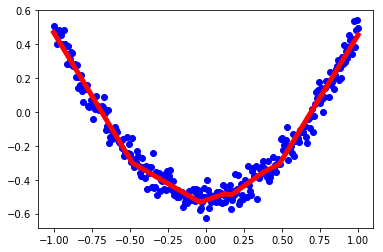

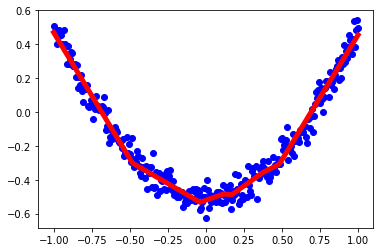

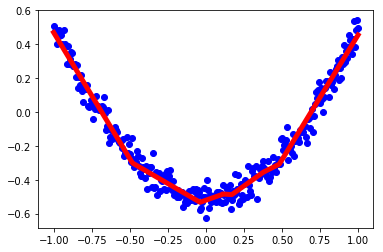

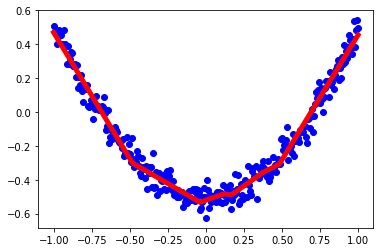

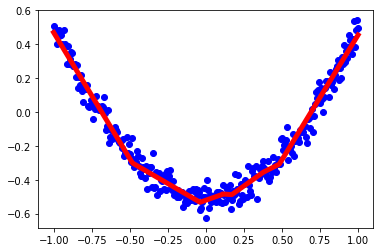

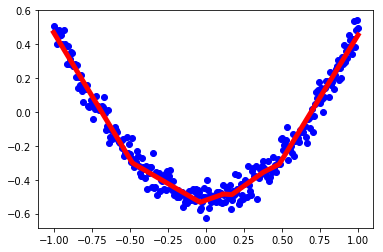

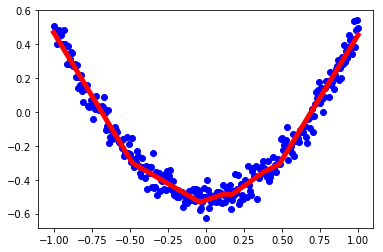

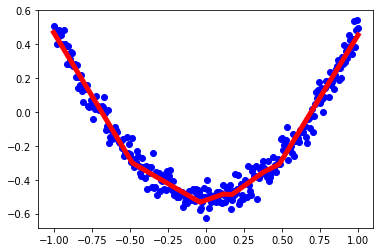

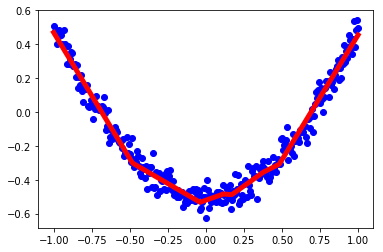

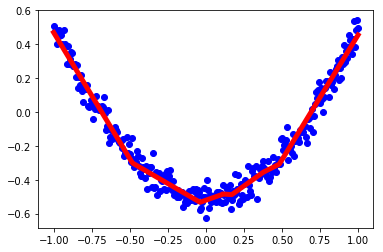

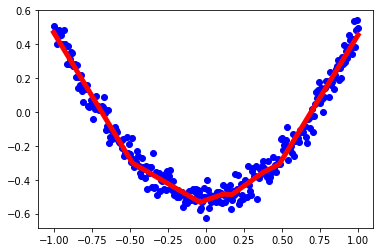

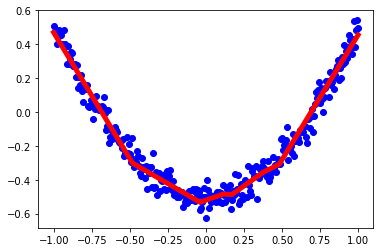

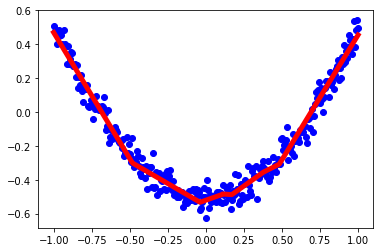

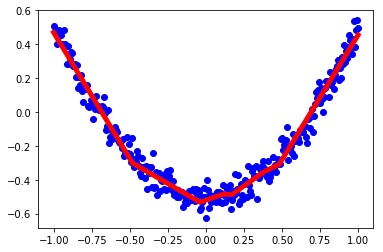

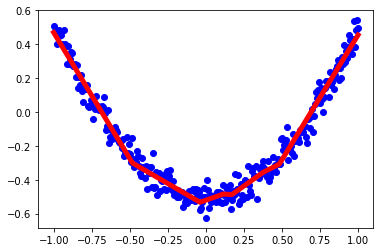

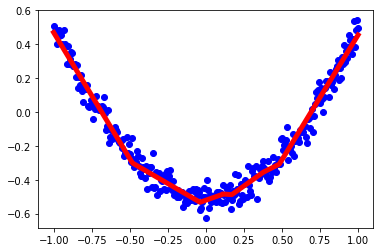

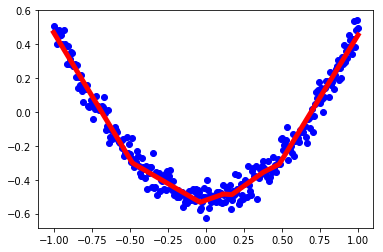

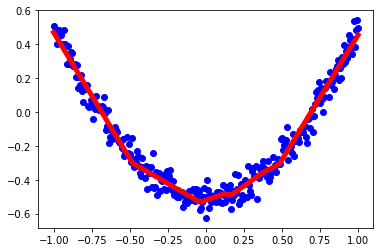

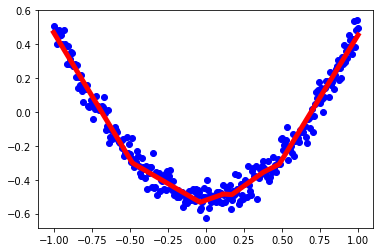

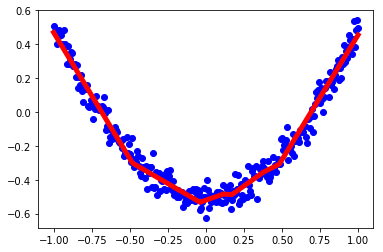

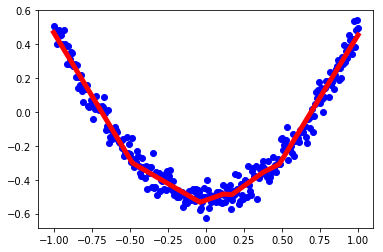

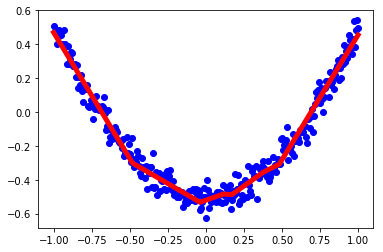

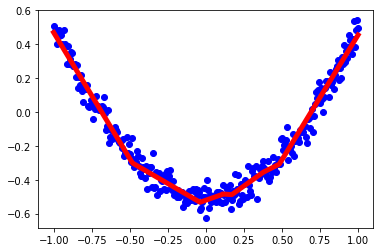

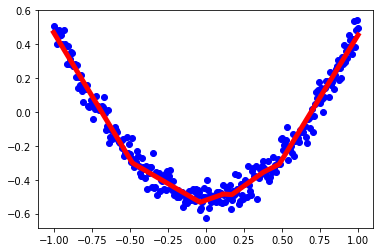

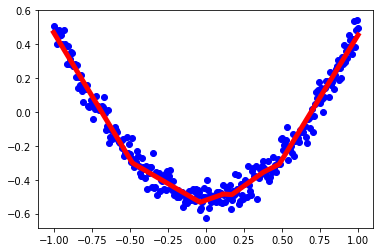

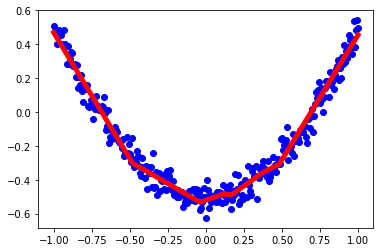

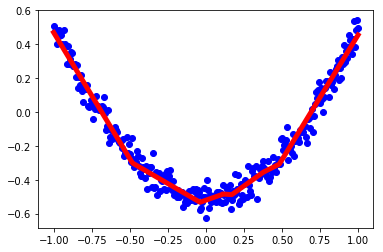

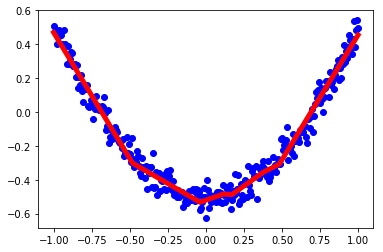

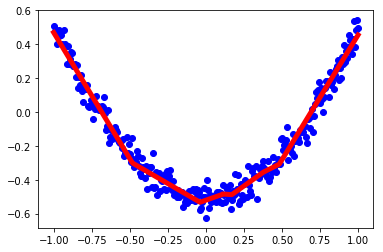

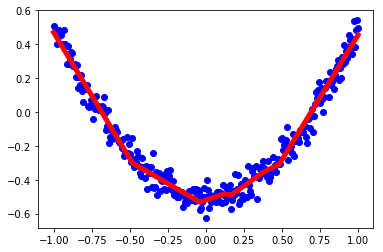

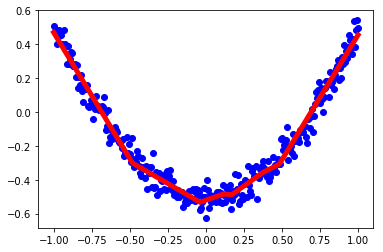

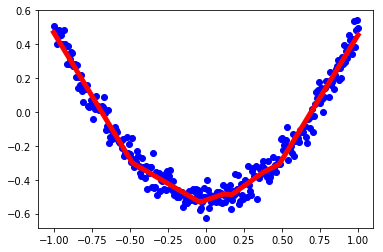

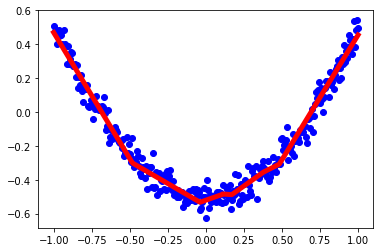

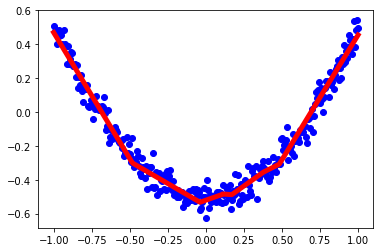

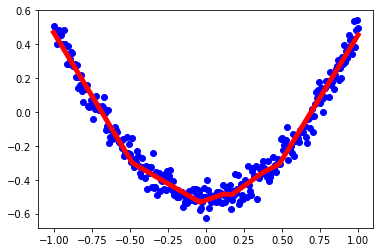

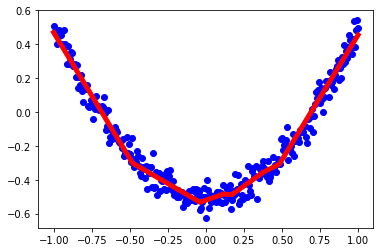

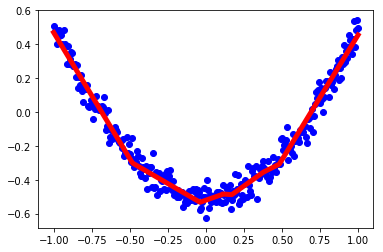

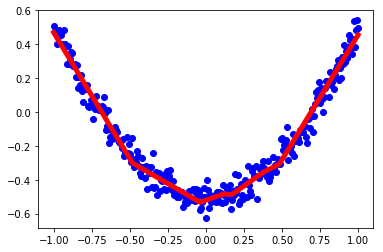

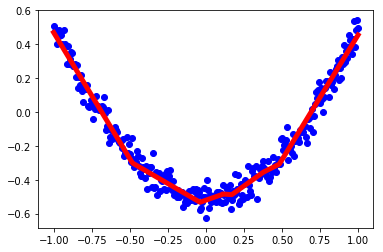

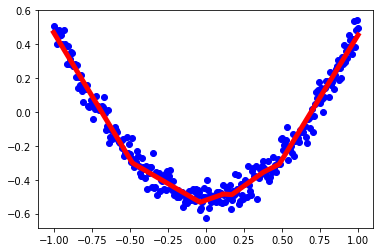

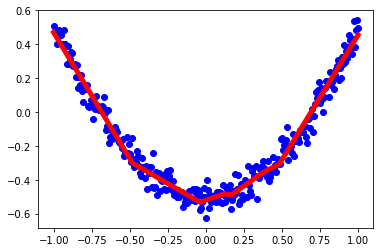

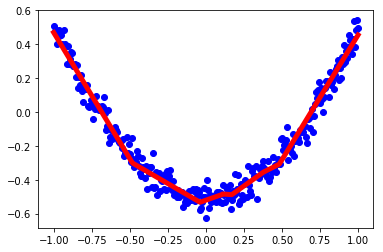

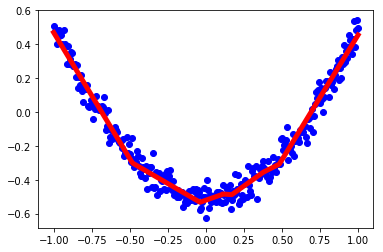

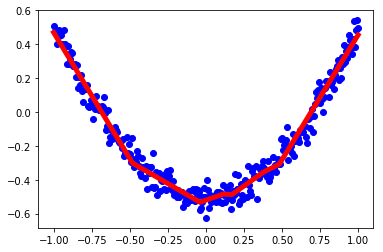

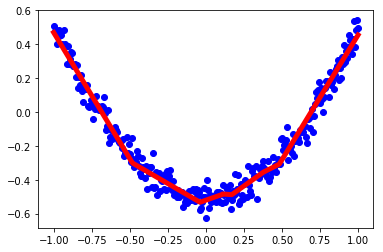

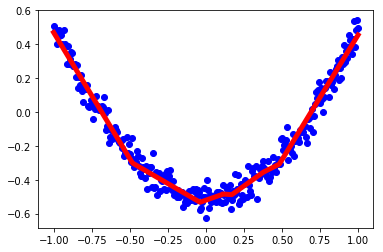

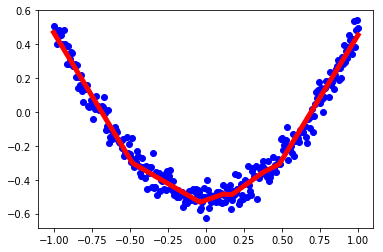

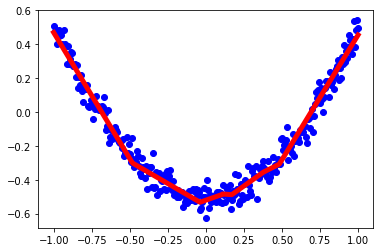

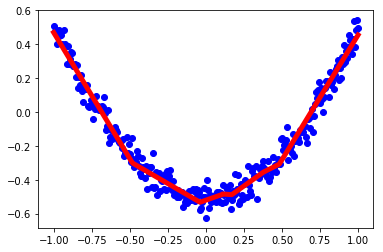

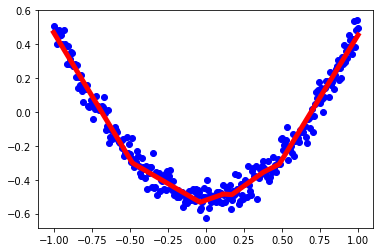

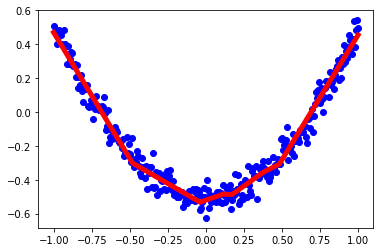

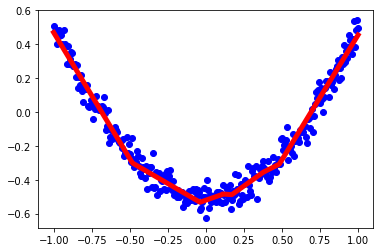

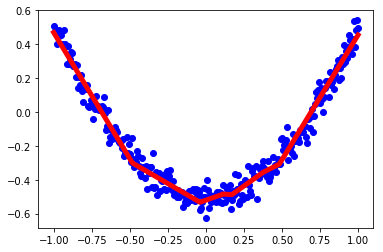

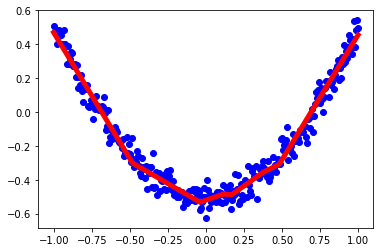

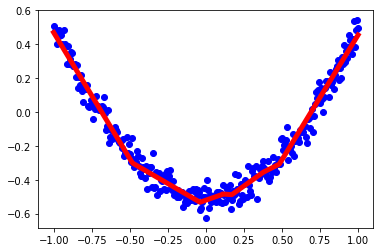

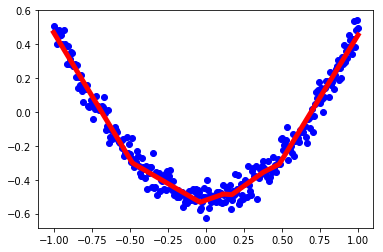

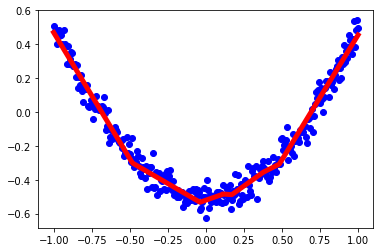

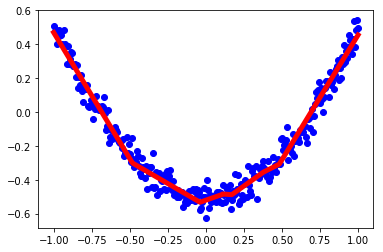

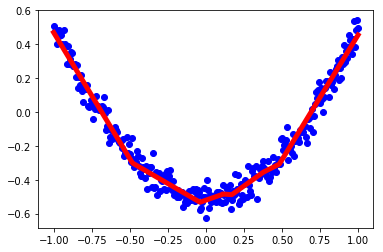

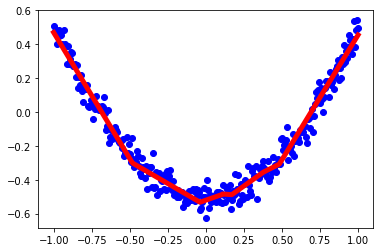

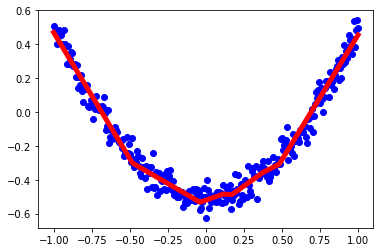

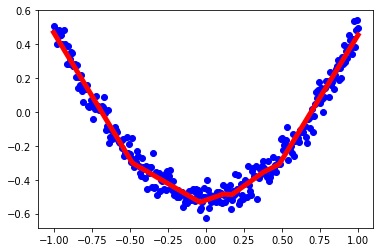

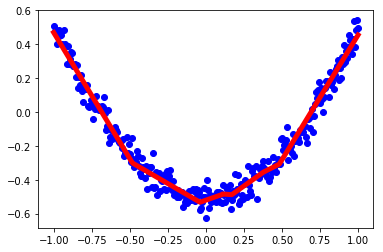

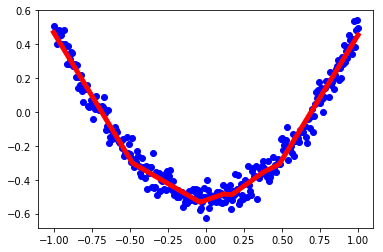

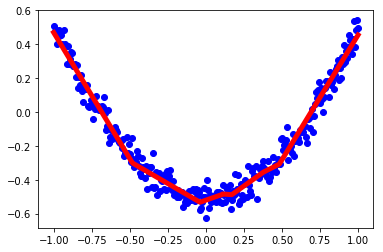

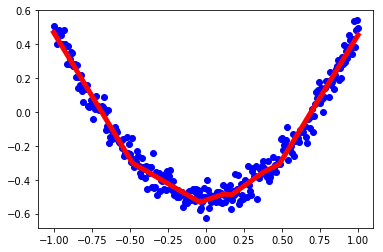

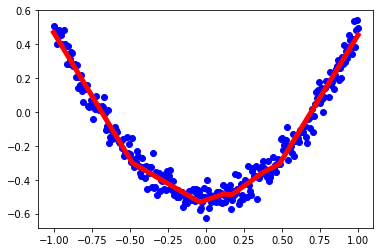

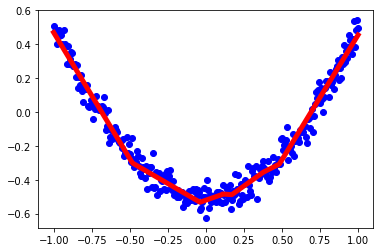

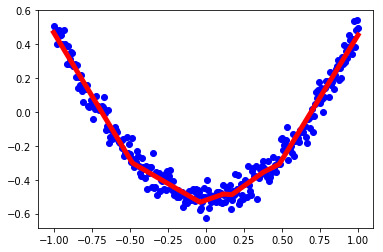

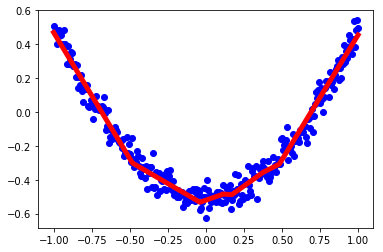

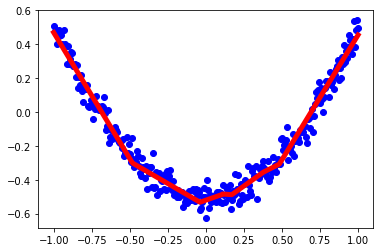

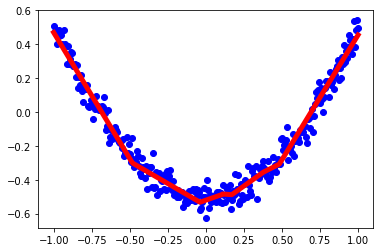

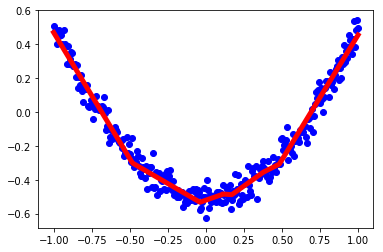

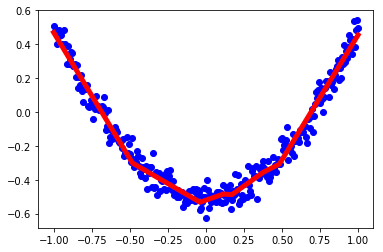

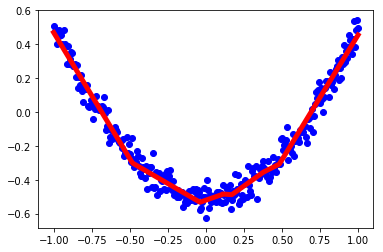

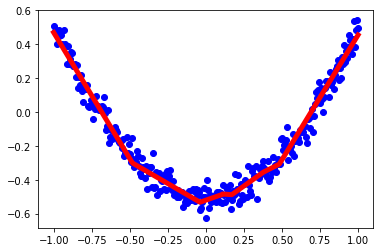

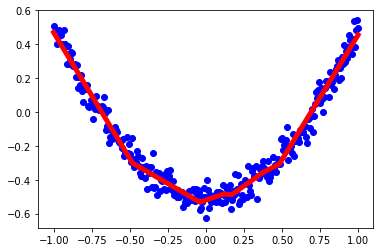

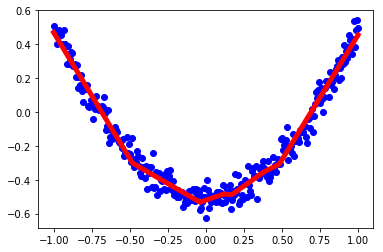

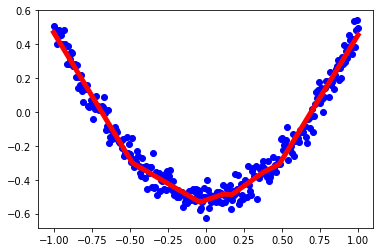

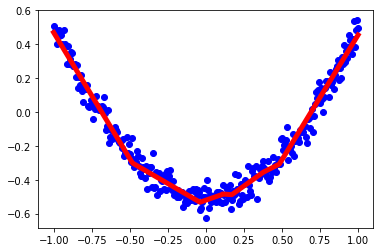

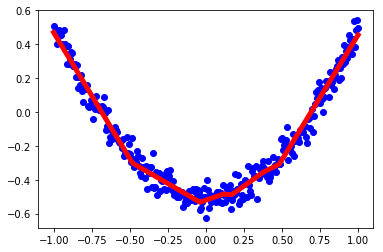

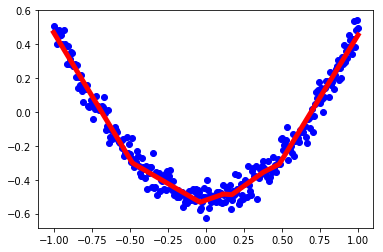

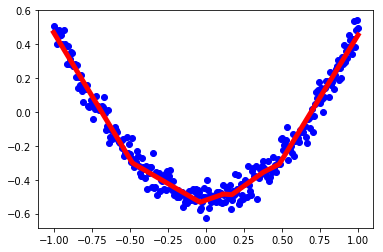

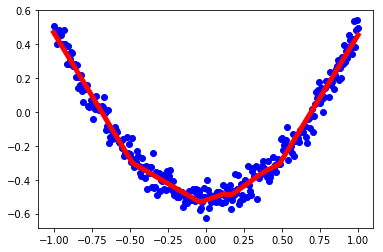

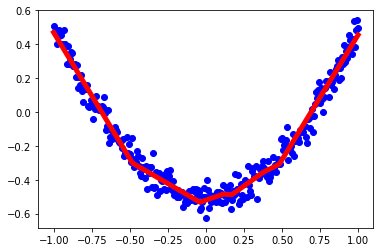

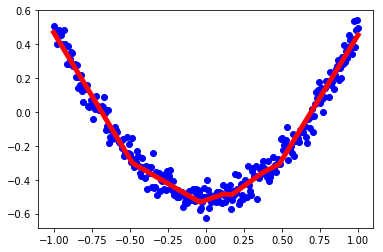

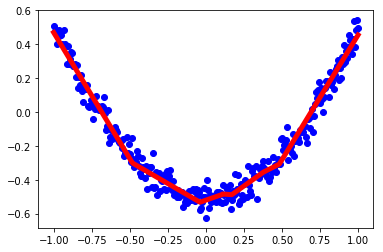

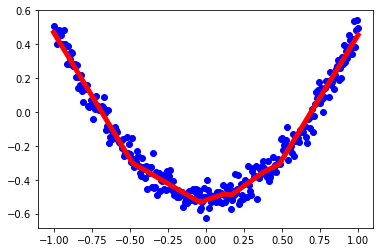

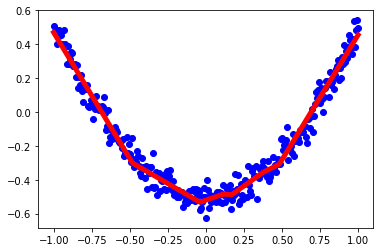

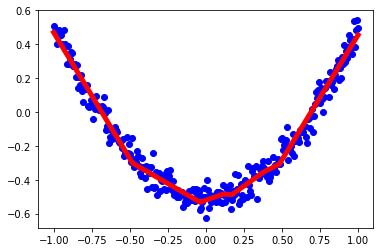

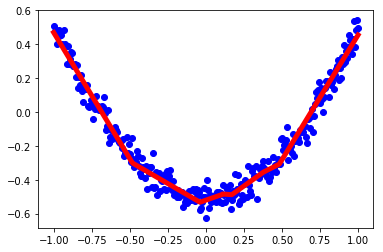

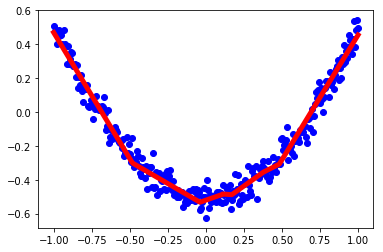

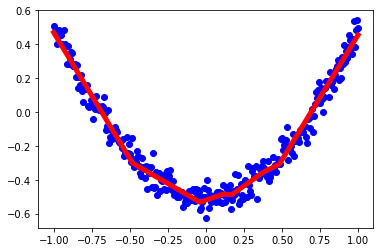

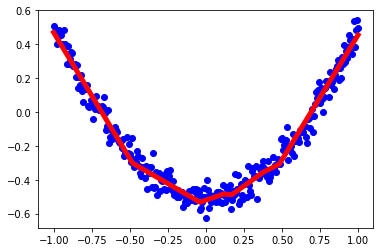

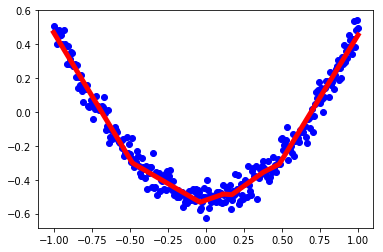

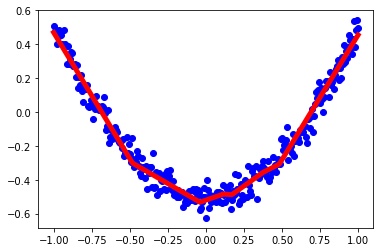

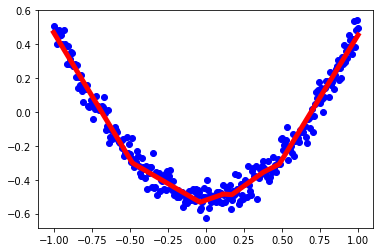

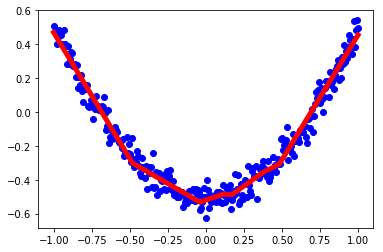

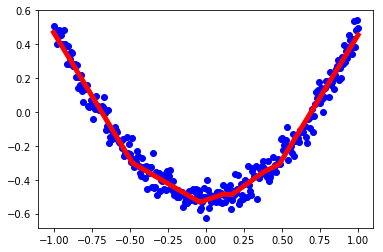

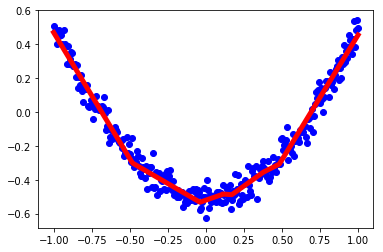

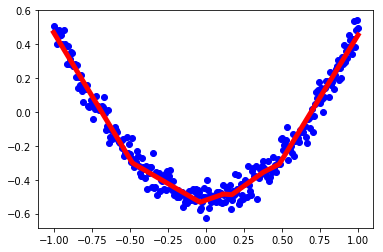

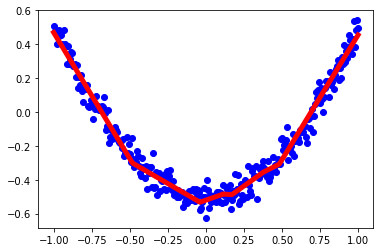

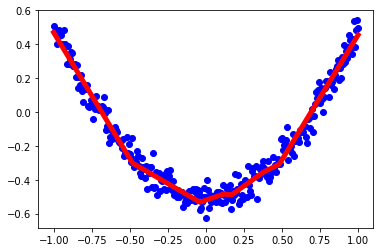

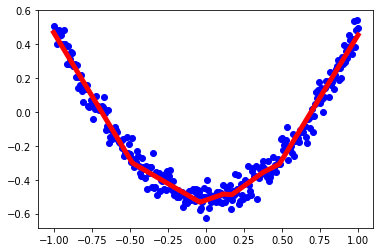

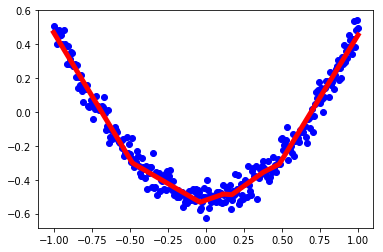

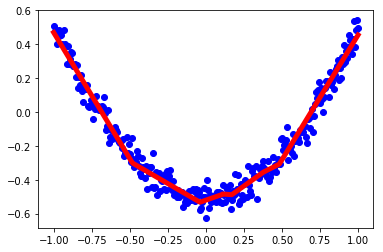

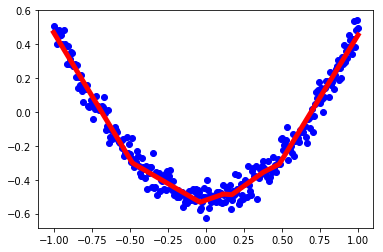

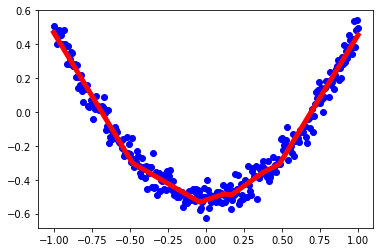

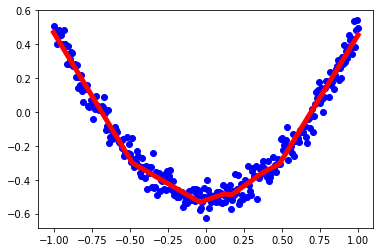

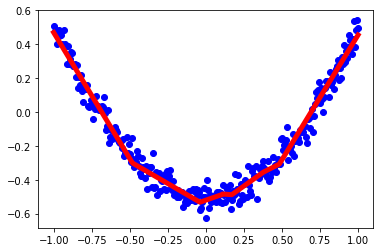

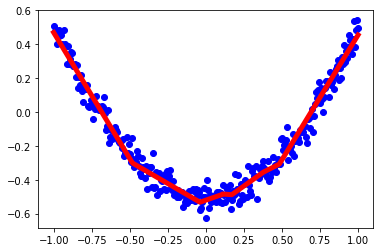

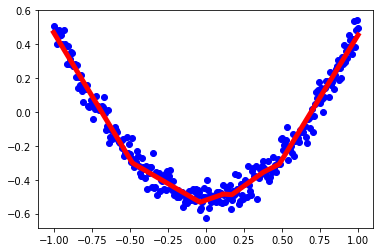

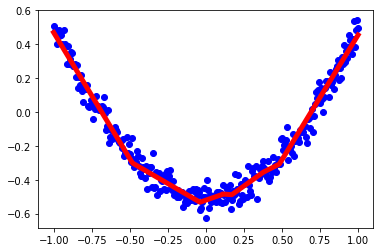

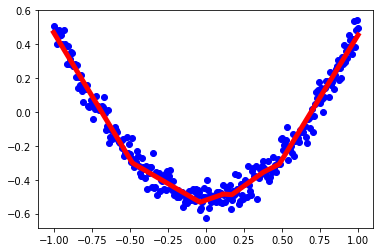

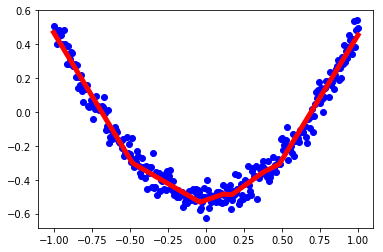

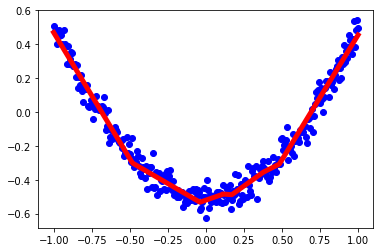

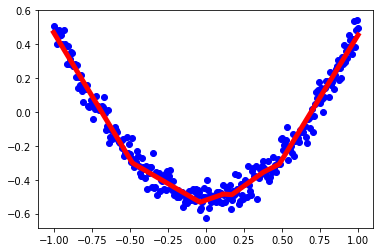

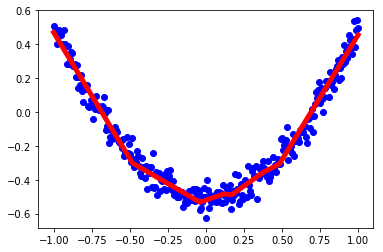

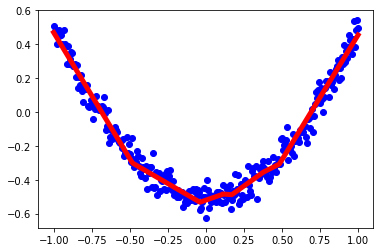

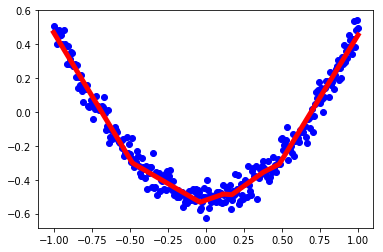

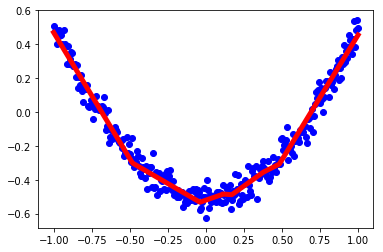

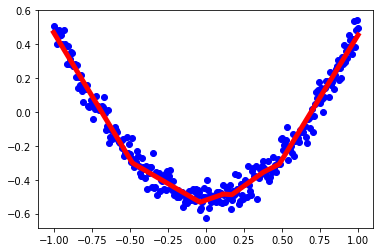

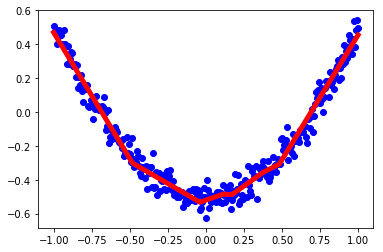

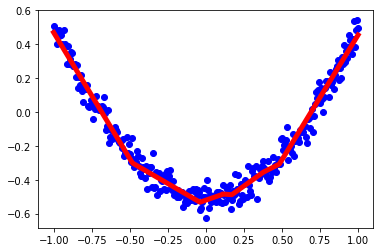

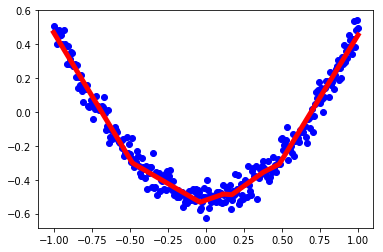

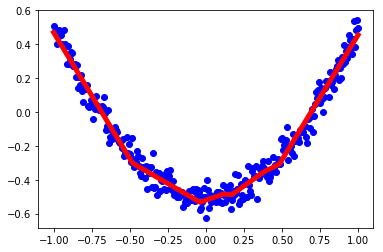

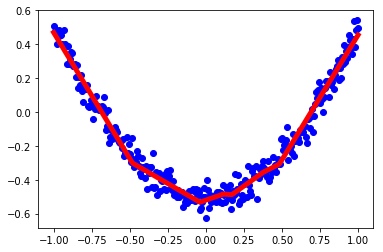

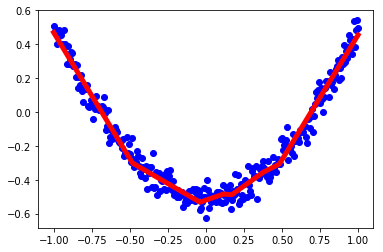

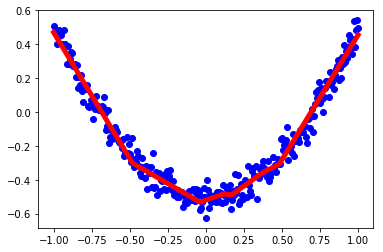

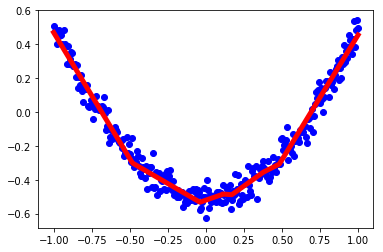

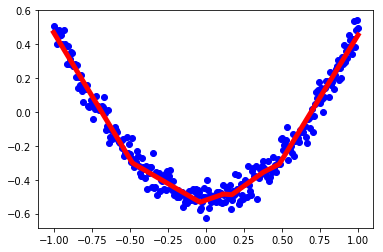

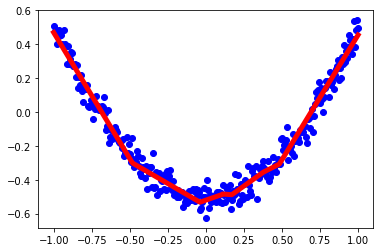

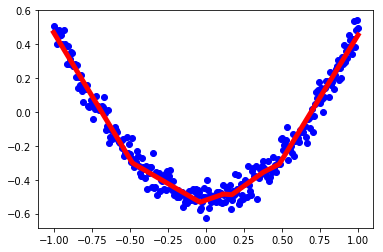

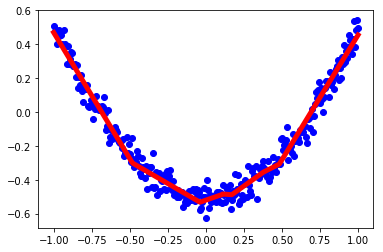

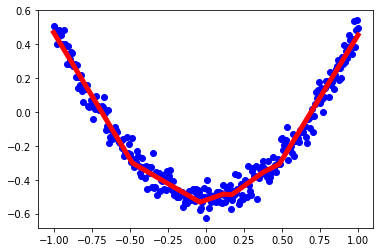

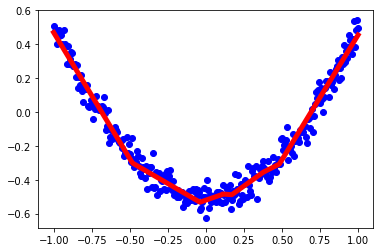

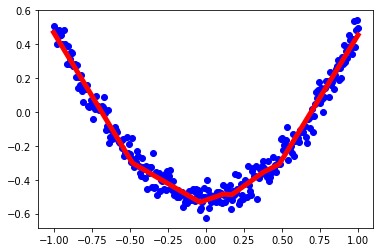

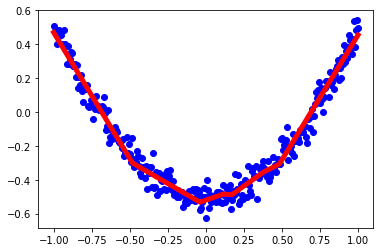

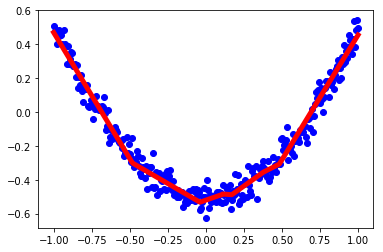

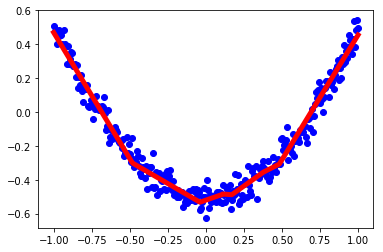

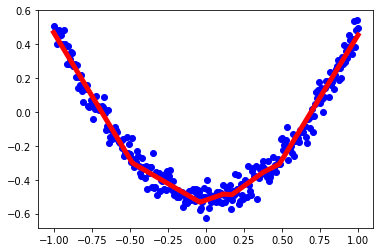

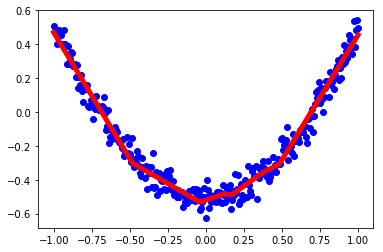

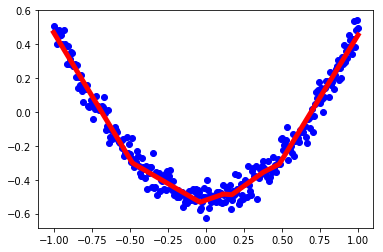

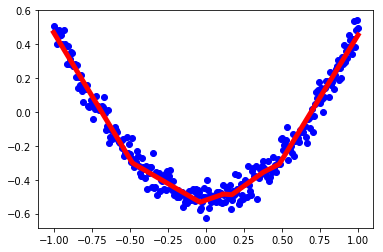

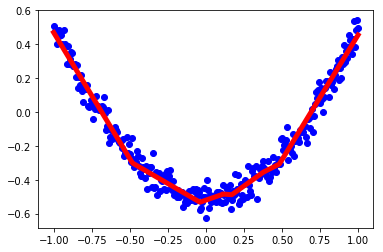

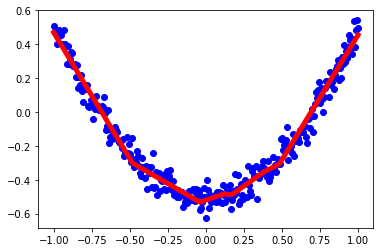

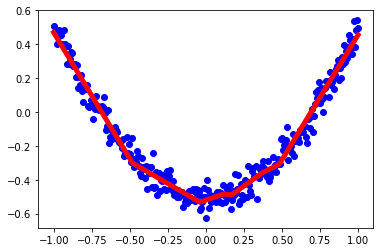

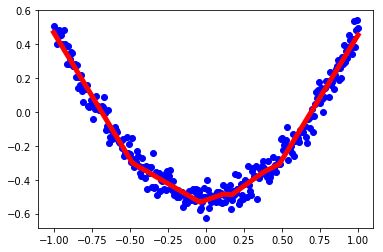

KeyboardInterrupt: 

In [9]:
# 之後就可以用for迴圈訓練了
for i in range(30000):
   
     # 整個訓練最核心的code , feed_dict 表示餵入 輸入與輸出
     # x_data:[300,1]   y_data:[300,1]
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # 畫出下一條線之前 必須把前一條線刪除掉 不然會看不出學習成果
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        
        # 要取出預測的數值 必須再run 一次才能取出
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        # 每隔0.1 秒畫出來
        # lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.plot(x_data, y_data, 'bo')
        lines = plt.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(0.1)